# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 19:28:34.882286: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T19:28:38.296471
2025-04-14 19:28:38.296471


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 1
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 259
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 19:28:32"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >], dtype=object)

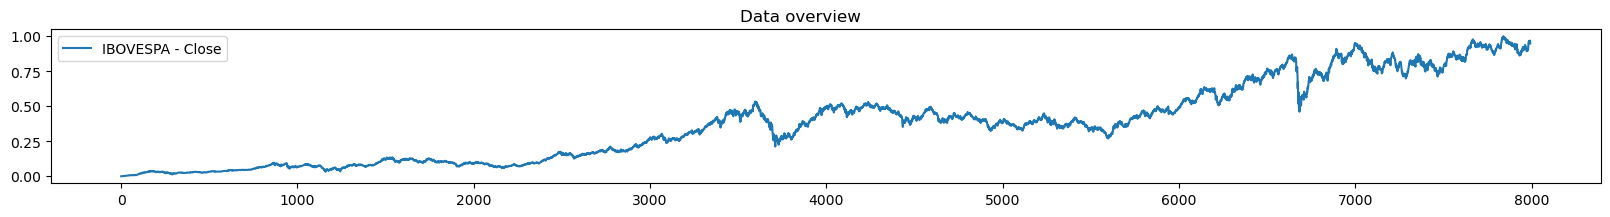

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >], dtype=object)

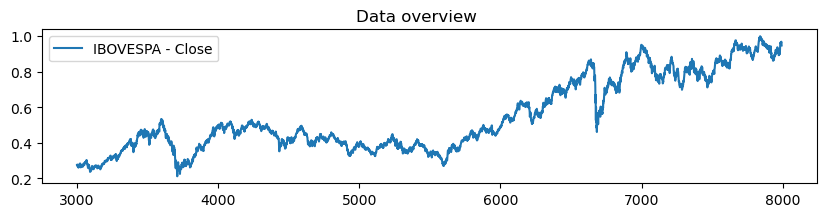

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >], dtype=object)

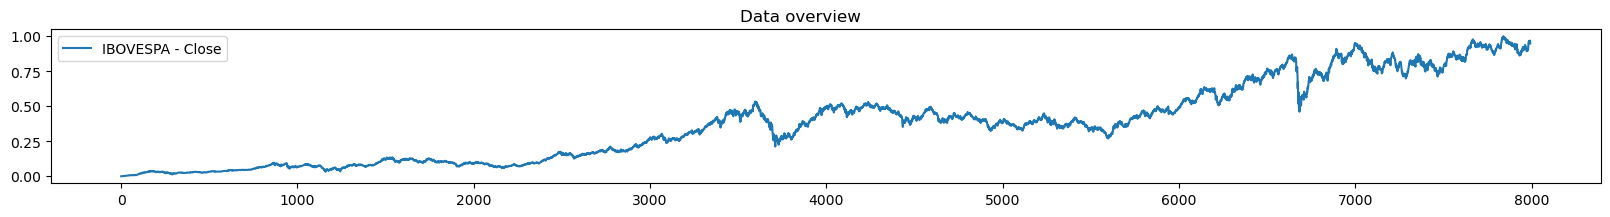

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

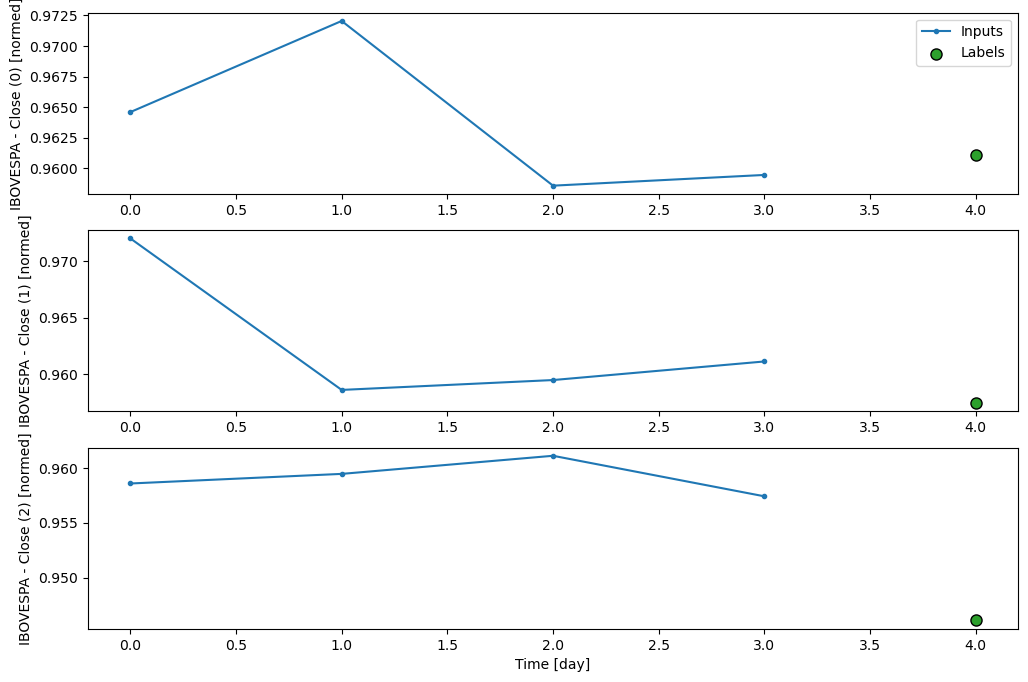

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = tf.keras.backend.eval(optimizer.learning_rate)
        # lr = tf.keras.backend.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print(f"\nEpoch: {Epoch_count} - LR: {lr}")
        return lr

In [24]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  # opitimizer AdamW
  # optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE) # weight_decay=0.004
  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=0.004)

  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=1e-6)
  
  def scheduler(epoch, lr):
    decay = LEARNING_DECAY
    decayEveryEpochs = DECAY_EVERY_EPOCHS
    iterations = epoch // decayEveryEpochs
    optimizer = model.optimizer
    # return tf.keras.backend.eval(optimizer.learning_rate)
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % decayEveryEpochs == 0) and (epoch != 0):
        lr = lr * (1 - decay)
        lr = lr * (1. / (1. + decay * iterations))
    print(f"Epoch: {epoch} - Learning rate: {optimizer.learning_rate} - LR: {lr}")
    return lr
    return tf.keras.backend.eval(optimizer.learning_rate)
  
  printlr = printlearningrate() 
  updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr,early_stopping]) # updatelr])
  return history

Definir modelo da rede e realizar o treinamento

In [25]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [26]:
num_features = df_x_values.shape[1]

num_features

1

In [27]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [28]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [29]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [30]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [31]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11:48 3s/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0142e-05 - root_mean_squared_error: 0.0032

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 57.8945 - mean_squared_error: 4.7561e-05 - root_mean_squared_error: 0.0063   

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 49.3815 - mean_squared_error: 6.8150e-05 - root_mean_squared_error: 0.0078

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 43.5708 - mean_squared_error: 6.9467e-05 - root_mean_squared_error: 0.0080

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 39.0855 - mean_squared_error: 6.8202e-05 - root_mean_squared_error: 0.0080

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 36.2681 - mean_squared_error: 8.2215e-05 - root_mean_squared_error: 0.0088

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 34.2226 - mean_squared_error: 9.4964e-05 - root_mean_squared_error: 0.0094

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 32.7740 - mean_squared_error: 1.1429e-04 - root_mean_squared_error: 0.0102

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 31.7483 - mean_squared_error: 1.4848e-04 - root_mean_squared_error: 0.0114

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 30.7417 - mean_squared_error: 1.7861e-04 - root_mean_squared_error: 0.0124

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 29.9427 - mean_squared_error: 1.9733e-04 - root_mean_squared_error: 0.0131

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 29.2400 - mean_squared_error: 2.1243e-04 - root_mean_squared_error: 0.0136

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 28.6515 - mean_squared_error: 2.3326e-04 - root_mean_squared_error: 0.0143

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 28.1534 - mean_squared_error: 2.6009e-04 - root_mean_squared_error: 0.0150

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 27.6480 - mean_squared_error: 2.8234e-04 - root_mean_squared_error: 0.0157

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 27.1828 - mean_squared_error: 3.1210e-04 - root_mean_squared_error: 0.0164

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 26.6792 - mean_squared_error: 3.5199e-04 - root_mean_squared_error: 0.0173

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 26.3227 - mean_squared_error: 4.1834e-04 - root_mean_squared_error: 0.0186

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 26.0353 - mean_squared_error: 5.3211e-04 - root_mean_squared_error: 0.0203

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 25.7937 - mean_squared_error: 6.8057e-04 - root_mean_squared_error: 0.0222

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 25.5640 - mean_squared_error: 8.2232e-04 - root_mean_squared_error: 0.0241

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 25.3345 - mean_squared_error: 9.5071e-04 - root_mean_squared_error: 0.0257

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 25.1044 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0272    

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 24.8823 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0286

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 24.6288 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0300

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 24.4446 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0310

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 24.2651 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0319

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 24.0677 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0329

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 23.8782 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0339

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 23.6853 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0347

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 23.4944 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0356

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 23.2886 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0367

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 23.1159 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0377

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 22.9427 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0387


Epoch: 1 - LR: 0.009752360172569752
238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 22.8193 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0393 - val_loss: 0.1202 - val_mean_absolute_error: 0.1202 - val_mean_absolute_percentage_error: 12.8587 - val_mean_squared_error: 0.0157 - val_root_mean_squared_error: 0.1251


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.6136 - mean_absolute_error: 0.6136 - mean_absolute_percentage_error: 28786.2656 - mean_squared_error: 0.3765 - root_mean_squared_error: 0.6136

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5994 - mean_absolute_error: 0.5994 - mean_absolute_percentage_error: 13312.5742 - mean_squared_error: 0.3599 - root_mean_squared_error: 0.5997 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5594 - mean_absolute_error: 0.5594 - mean_absolute_percentage_error: 9508.3047 - mean_squared_error: 0.3208 - root_mean_squared_error: 0.5647 

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5038 - mean_absolute_error: 0.5038 - mean_absolute_percentage_error: 7573.6714 - mean_squared_error: 0.2782 - root_mean_squared_error: 0.5224

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4575 - mean_absolute_error: 0.4575 - mean_absolute_percentage_error: 6363.5156 - mean_squared_error: 0.2449 - root_mean_squared_error: 0.4867

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4140 - mean_absolute_error: 0.4140 - mean_absolute_percentage_error: 5420.8433 - mean_squared_error: 0.2157 - root_mean_squared_error: 0.4531

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3828 - mean_absolute_error: 0.3828 - mean_absolute_percentage_error: 4820.5933 - mean_squared_error: 0.1957 - root_mean_squared_error: 0.4288

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3530 - mean_absolute_error: 0.3530 - mean_absolute_percentage_error: 4294.0806 - mean_squared_error: 0.1774 - root_mean_squared_error: 0.4053

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3307 - mean_absolute_error: 0.3307 - mean_absolute_percentage_error: 3928.2832 - mean_squared_error: 0.1642 - root_mean_squared_error: 0.3877

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3112 - mean_absolute_error: 0.3112 - mean_absolute_percentage_error: 3625.9128 - mean_squared_error: 0.1530 - root_mean_squared_error: 0.3723

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2943 - mean_absolute_error: 0.2943 - mean_absolute_percentage_error: 3371.4331 - mean_squared_error: 0.1434 - root_mean_squared_error: 0.3587

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2794 - mean_absolute_error: 0.2794 - mean_absolute_percentage_error: 3153.9014 - mean_squared_error: 0.1351 - root_mean_squared_error: 0.3465

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2663 - mean_absolute_error: 0.2663 - mean_absolute_percentage_error: 2965.5310 - mean_squared_error: 0.1278 - root_mean_squared_error: 0.3355

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2561 - mean_absolute_error: 0.2561 - mean_absolute_percentage_error: 2822.9041 - mean_squared_error: 0.1222 - root_mean_squared_error: 0.3270

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2454 - mean_absolute_error: 0.2454 - mean_absolute_percentage_error: 2674.6492 - mean_squared_error: 0.1163 - root_mean_squared_error: 0.3178

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2357 - mean_absolute_error: 0.2357 - mean_absolute_percentage_error: 2542.7078 - mean_squared_error: 0.1110 - root_mean_squared_error: 0.3094

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 2424.4507 - mean_squared_error: 0.1063 - root_mean_squared_error: 0.3016

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2192 - mean_absolute_error: 0.2192 - mean_absolute_percentage_error: 2317.8667 - mean_squared_error: 0.1020 - root_mean_squared_error: 0.2946

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2123 - mean_absolute_error: 0.2123 - mean_absolute_percentage_error: 2221.2424 - mean_squared_error: 0.0982 - root_mean_squared_error: 0.2882

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2060 - mean_absolute_error: 0.2060 - mean_absolute_percentage_error: 2133.1396 - mean_squared_error: 0.0946 - root_mean_squared_error: 0.2822

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2001 - mean_absolute_error: 0.2001 - mean_absolute_percentage_error: 2052.4480 - mean_squared_error: 0.0913 - root_mean_squared_error: 0.2766

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1962 - mean_absolute_error: 0.1962 - mean_absolute_percentage_error: 1998.8301 - mean_squared_error: 0.0892 - root_mean_squared_error: 0.2728

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1911 - mean_absolute_error: 0.1911 - mean_absolute_percentage_error: 1928.7638 - mean_squared_error: 0.0863 - root_mean_squared_error: 0.2677

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1862 - mean_absolute_error: 0.1862 - mean_absolute_percentage_error: 1863.9196 - mean_squared_error: 0.0836 - root_mean_squared_error: 0.2630

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1817 - mean_absolute_error: 0.1817 - mean_absolute_percentage_error: 1803.7159 - mean_squared_error: 0.0811 - root_mean_squared_error: 0.2585

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1774 - mean_absolute_error: 0.1774 - mean_absolute_percentage_error: 1747.6554 - mean_squared_error: 0.0788 - root_mean_squared_error: 0.2542

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1734 - mean_absolute_error: 0.1734 - mean_absolute_percentage_error: 1695.3173 - mean_squared_error: 0.0766 - root_mean_squared_error: 0.2502

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1697 - mean_absolute_error: 0.1697 - mean_absolute_percentage_error: 1646.3341 - mean_squared_error: 0.0746 - root_mean_squared_error: 0.2463

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1663 - mean_absolute_error: 0.1663 - mean_absolute_percentage_error: 1600.3813 - mean_squared_error: 0.0727 - root_mean_squared_error: 0.2427

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1630 - mean_absolute_error: 0.1630 - mean_absolute_percentage_error: 1557.1714 - mean_squared_error: 0.0709 - root_mean_squared_error: 0.2392

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1603 - mean_absolute_error: 0.1603 - mean_absolute_percentage_error: 1522.1267 - mean_squared_error: 0.0694 - root_mean_squared_error: 0.2364

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1574 - mean_absolute_error: 0.1574 - mean_absolute_percentage_error: 1483.3829 - mean_squared_error: 0.0678 - root_mean_squared_error: 0.2333

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1547 - mean_absolute_error: 0.1547 - mean_absolute_percentage_error: 1446.7571 - mean_squared_error: 0.0663 - root_mean_squared_error: 0.2303

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1518 - mean_absolute_error: 0.1518 - mean_absolute_percentage_error: 1407.2621 - mean_squared_error: 0.0646 - root_mean_squared_error: 0.2270

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1493 - mean_absolute_error: 0.1493 - mean_absolute_percentage_error: 1374.6002 - mean_squared_error: 0.0633 - root_mean_squared_error: 0.2243


Epoch: 2 - LR: 0.009510851465165615
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1490 - mean_absolute_error: 0.1490 - mean_absolute_percentage_error: 1370.0771 - mean_squared_error: 0.0631 - root_mean_squared_error: 0.2239 - val_loss: 0.0498 - val_mean_absolute_error: 0.0498 - val_mean_absolute_percentage_error: 5.3006 - val_mean_squared_error: 0.0030 - val_root_mean_squared_error: 0.0546


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.4245 - mean_absolute_error: 0.4245 - mean_absolute_percentage_error: 19912.9531 - mean_squared_error: 0.1802 - root_mean_squared_error: 0.4245

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4153 - mean_absolute_error: 0.4153 - mean_absolute_percentage_error: 9204.8672 - mean_squared_error: 0.1727 - root_mean_squared_error: 0.4155   

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3918 - mean_absolute_error: 0.3918 - mean_absolute_percentage_error: 6590.7969 - mean_squared_error: 0.1563 - root_mean_squared_error: 0.3944

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3506 - mean_absolute_error: 0.3506 - mean_absolute_percentage_error: 5120.3184 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3630

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3180 - mean_absolute_error: 0.3180 - mean_absolute_percentage_error: 4327.7695 - mean_squared_error: 0.1186 - root_mean_squared_error: 0.3389

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2902 - mean_absolute_error: 0.2902 - mean_absolute_percentage_error: 3768.5393 - mean_squared_error: 0.1063 - root_mean_squared_error: 0.3185

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2672 - mean_absolute_error: 0.2672 - mean_absolute_percentage_error: 3350.8396 - mean_squared_error: 0.0965 - root_mean_squared_error: 0.3014

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2479 - mean_absolute_error: 0.2479 - mean_absolute_percentage_error: 3025.2334 - mean_squared_error: 0.0884 - root_mean_squared_error: 0.2868

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2315 - mean_absolute_error: 0.2315 - mean_absolute_percentage_error: 2763.2517 - mean_squared_error: 0.0818 - root_mean_squared_error: 0.2741

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2173 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 2547.3503 - mean_squared_error: 0.0761 - root_mean_squared_error: 0.2631

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2049 - mean_absolute_error: 0.2049 - mean_absolute_percentage_error: 2366.0081 - mean_squared_error: 0.0713 - root_mean_squared_error: 0.2533

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1940 - mean_absolute_error: 0.1940 - mean_absolute_percentage_error: 2211.2766 - mean_squared_error: 0.0671 - root_mean_squared_error: 0.2446

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1844 - mean_absolute_error: 0.1844 - mean_absolute_percentage_error: 2077.4915 - mean_squared_error: 0.0634 - root_mean_squared_error: 0.2367

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1758 - mean_absolute_error: 0.1758 - mean_absolute_percentage_error: 1960.5319 - mean_squared_error: 0.0602 - root_mean_squared_error: 0.2296

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1680 - mean_absolute_error: 0.1680 - mean_absolute_percentage_error: 1857.3081 - mean_squared_error: 0.0573 - root_mean_squared_error: 0.2232

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1610 - mean_absolute_error: 0.1610 - mean_absolute_percentage_error: 1765.4575 - mean_squared_error: 0.0547 - root_mean_squared_error: 0.2172

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1547 - mean_absolute_error: 0.1547 - mean_absolute_percentage_error: 1683.1366 - mean_squared_error: 0.0523 - root_mean_squared_error: 0.2118

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1489 - mean_absolute_error: 0.1489 - mean_absolute_percentage_error: 1608.8934 - mean_squared_error: 0.0502 - root_mean_squared_error: 0.2067

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1437 - mean_absolute_error: 0.1437 - mean_absolute_percentage_error: 1541.5610 - mean_squared_error: 0.0483 - root_mean_squared_error: 0.2020

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1389 - mean_absolute_error: 0.1389 - mean_absolute_percentage_error: 1480.1833 - mean_squared_error: 0.0465 - root_mean_squared_error: 0.1977

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1345 - mean_absolute_error: 0.1345 - mean_absolute_percentage_error: 1423.9779 - mean_squared_error: 0.0448 - root_mean_squared_error: 0.1936

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1304 - mean_absolute_error: 0.1304 - mean_absolute_percentage_error: 1372.2966 - mean_squared_error: 0.0433 - root_mean_squared_error: 0.1898

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1267 - mean_absolute_error: 0.1267 - mean_absolute_percentage_error: 1324.5920 - mean_squared_error: 0.0419 - root_mean_squared_error: 0.1862

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1231 - mean_absolute_error: 0.1231 - mean_absolute_percentage_error: 1280.4082 - mean_squared_error: 0.0406 - root_mean_squared_error: 0.1828

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 1239.3568 - mean_squared_error: 0.0394 - root_mean_squared_error: 0.1796

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1176 - mean_absolute_error: 0.1176 - mean_absolute_percentage_error: 1211.7660 - mean_squared_error: 0.0386 - root_mean_squared_error: 0.1774

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1147 - mean_absolute_error: 0.1147 - mean_absolute_percentage_error: 1175.3394 - mean_squared_error: 0.0375 - root_mean_squared_error: 0.1745

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1119 - mean_absolute_error: 0.1119 - mean_absolute_percentage_error: 1141.2483 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1717

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1093 - mean_absolute_error: 0.1093 - mean_absolute_percentage_error: 1109.2660 - mean_squared_error: 0.0355 - root_mean_squared_error: 0.1691

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1069 - mean_absolute_error: 0.1069 - mean_absolute_percentage_error: 1079.1974 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1666

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1043 - mean_absolute_error: 0.1043 - mean_absolute_percentage_error: 1046.9553 - mean_squared_error: 0.0336 - root_mean_squared_error: 0.1638

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1022 - mean_absolute_error: 0.1022 - mean_absolute_percentage_error: 1020.4323 - mean_squared_error: 0.0328 - root_mean_squared_error: 0.1616

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1001 - mean_absolute_error: 0.1001 - mean_absolute_percentage_error: 995.3448 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1594 

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0979 - mean_absolute_error: 0.0979 - mean_absolute_percentage_error: 968.2816 - mean_squared_error: 0.0312 - root_mean_squared_error: 0.1570


Epoch: 3 - LR: 0.009275324642658234
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0964 - mean_absolute_error: 0.0964 - mean_absolute_percentage_error: 949.0276 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1553 - val_loss: 0.0164 - val_mean_absolute_error: 0.0164 - val_mean_absolute_percentage_error: 1.7449 - val_mean_squared_error: 3.5824e-04 - val_root_mean_squared_error: 0.0189


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 2:34 653ms/step - loss: 0.1173 - mean_absolute_error: 0.1173 - mean_absolute_percentage_error: 5503.4141 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1173

  3/238 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1140 - mean_absolute_error: 0.1140 - mean_absolute_percentage_error: 3935.0024 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1140   

 10/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 2163.5771 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0954

 18/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 1530.3547 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0844

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 1244.1301 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0776 

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 1036.1605 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0716

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 909.3024 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0675 

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 813.1000 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0640

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 747.0927 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0614

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 683.7726 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0588

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 638.3449 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0568

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 593.2293 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0547

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 554.7214 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0529

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 521.4108 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0512

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 492.2744 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0497

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 463.1169 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0481

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 443.6498 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0471

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 425.9213 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0461

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 407.1371 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0451

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 392.4614 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0444

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 376.7715 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 362.4173 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 347.4376 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 335.4168 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 322.7657 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 312.5395 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 303.0149 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0403

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 294.1195 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 285.7892 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 277.9660 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0392

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 270.6068 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 263.6698 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 257.1192 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0384

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 250.9232 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 245.0512 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381


Epoch: 4 - LR: 0.009045630693435669
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 241.0418 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380 - val_loss: 0.0138 - val_mean_absolute_error: 0.0138 - val_mean_absolute_percentage_error: 1.4816 - val_mean_squared_error: 2.8459e-04 - val_root_mean_squared_error: 0.0169


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.2114 - mean_absolute_error: 0.2114 - mean_absolute_percentage_error: 9916.2363 - mean_squared_error: 0.0447 - root_mean_squared_error: 0.2114

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1981 - mean_absolute_error: 0.1981 - mean_absolute_percentage_error: 4537.5933 - mean_squared_error: 0.0396 - root_mean_squared_error: 0.1987 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1716 - mean_absolute_error: 0.1716 - mean_absolute_percentage_error: 3178.8408 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1779

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1461 - mean_absolute_error: 0.1461 - mean_absolute_percentage_error: 2430.3733 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1585

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1297 - mean_absolute_error: 0.1297 - mean_absolute_percentage_error: 2037.3456 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1459

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1153 - mean_absolute_error: 0.1153 - mean_absolute_percentage_error: 1731.8622 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1346

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 1537.5316 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1267

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 1386.3245 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1200

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0905 - mean_absolute_error: 0.0905 - mean_absolute_percentage_error: 1264.8853 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1144

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 1164.9530 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1095

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 1081.1099 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1052

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 1009.6425 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1014

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 947.9138 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0980 

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 893.9965 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0950

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 840.1105 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0918

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 798.5121 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0893

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 761.2212 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0870

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 727.5879 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0849

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 697.0829 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0829

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 676.9656 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0816

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 654.4518 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0801

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 630.1847 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0785

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 607.8179 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0770

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 587.1300 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0755

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 567.9333 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0742

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 550.0671 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0729

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 533.3936 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0717

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 517.7936 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0705

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 503.1633 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0694

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 489.4134 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0684

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 478.2676 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0675

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 465.9505 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0666

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 454.3124 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0658

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 443.2971 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0649


Epoch: 5 - LR: 0.008821624331176281
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 431.4079 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0641 - val_loss: 0.0215 - val_mean_absolute_error: 0.0215 - val_mean_absolute_percentage_error: 2.2936 - val_mean_squared_error: 5.4613e-04 - val_root_mean_squared_error: 0.0234


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 1845.6102 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0394

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 785.9685 - mean_squared_error: 9.3291e-04 - root_mean_squared_error: 0.0301

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 545.4966 - mean_squared_error: 7.6196e-04 - root_mean_squared_error: 0.0272

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 420.2467 - mean_squared_error: 6.6493e-04 - root_mean_squared_error: 0.0253

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 354.2339 - mean_squared_error: 5.9589e-04 - root_mean_squared_error: 0.0239

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 308.1615 - mean_squared_error: 5.4053e-04 - root_mean_squared_error: 0.0227

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 274.1011 - mean_squared_error: 4.9668e-04 - root_mean_squared_error: 0.0217

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 247.7216 - mean_squared_error: 4.6184e-04 - root_mean_squared_error: 0.0208

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 226.5484 - mean_squared_error: 4.3288e-04 - root_mean_squared_error: 0.0201

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 213.7747 - mean_squared_error: 4.1464e-04 - root_mean_squared_error: 0.0196

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 198.4286 - mean_squared_error: 3.9198e-04 - root_mean_squared_error: 0.0191

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 185.4025 - mean_squared_error: 3.7207e-04 - root_mean_squared_error: 0.0185

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 174.1753 - mean_squared_error: 3.5448e-04 - root_mean_squared_error: 0.0180

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 164.3905 - mean_squared_error: 3.3901e-04 - root_mean_squared_error: 0.0176

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 155.7754 - mean_squared_error: 3.2539e-04 - root_mean_squared_error: 0.0172

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 148.1221 - mean_squared_error: 3.1332e-04 - root_mean_squared_error: 0.0169

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 141.2691 - mean_squared_error: 3.0256e-04 - root_mean_squared_error: 0.0166

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 135.0940 - mean_squared_error: 2.9304e-04 - root_mean_squared_error: 0.0163

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 129.4966 - mean_squared_error: 2.8440e-04 - root_mean_squared_error: 0.0160

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 124.3940 - mean_squared_error: 2.7641e-04 - root_mean_squared_error: 0.0158

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 119.7211 - mean_squared_error: 2.6898e-04 - root_mean_squared_error: 0.0156

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 115.4252 - mean_squared_error: 2.6211e-04 - root_mean_squared_error: 0.0154

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 111.4610 - mean_squared_error: 2.5575e-04 - root_mean_squared_error: 0.0152

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 108.2977 - mean_squared_error: 2.5063e-04 - root_mean_squared_error: 0.0150

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 105.3286 - mean_squared_error: 2.4576e-04 - root_mean_squared_error: 0.0148

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 102.0870 - mean_squared_error: 2.4042e-04 - root_mean_squared_error: 0.0147

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 99.0613 - mean_squared_error: 2.3540e-04 - root_mean_squared_error: 0.0145 

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 96.2300 - mean_squared_error: 2.3071e-04 - root_mean_squared_error: 0.0144

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 93.2079 - mean_squared_error: 2.2571e-04 - root_mean_squared_error: 0.0142

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 90.7324 - mean_squared_error: 2.2172e-04 - root_mean_squared_error: 0.0141

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 88.4002 - mean_squared_error: 2.1819e-04 - root_mean_squared_error: 0.0140

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 86.2009 - mean_squared_error: 2.1586e-04 - root_mean_squared_error: 0.0139

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 83.8344 - mean_squared_error: 2.1423e-04 - root_mean_squared_error: 0.0139

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 81.8808 - mean_squared_error: 2.1338e-04 - root_mean_squared_error: 0.0139


Epoch: 6 - LR: 0.008603165857493877
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 79.7701 - mean_squared_error: 2.1256e-04 - root_mean_squared_error: 0.0139 - val_loss: 0.0109 - val_mean_absolute_error: 0.0109 - val_mean_absolute_percentage_error: 1.2029 - val_mean_squared_error: 1.6591e-04 - val_root_mean_squared_error: 0.0129


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 1410.8376 - mean_squared_error: 9.0754e-04 - root_mean_squared_error: 0.0301

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 598.2365 - mean_squared_error: 5.6814e-04 - root_mean_squared_error: 0.0236  

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 436.1575 - mean_squared_error: 5.0973e-04 - root_mean_squared_error: 0.0224

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 343.2829 - mean_squared_error: 4.6328e-04 - root_mean_squared_error: 0.0213

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 287.4149 - mean_squared_error: 4.2427e-04 - root_mean_squared_error: 0.0204

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 249.1466 - mean_squared_error: 3.9163e-04 - root_mean_squared_error: 0.0195

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 221.1801 - mean_squared_error: 3.6509e-04 - root_mean_squared_error: 0.0188

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 199.6532 - mean_squared_error: 3.4270e-04 - root_mean_squared_error: 0.0182

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 182.3855 - mean_squared_error: 3.2267e-04 - root_mean_squared_error: 0.0176

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 168.1864 - mean_squared_error: 3.0485e-04 - root_mean_squared_error: 0.0171

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 156.2809 - mean_squared_error: 2.8896e-04 - root_mean_squared_error: 0.0166

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 146.1361 - mean_squared_error: 2.7475e-04 - root_mean_squared_error: 0.0161

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 137.3773 - mean_squared_error: 2.6209e-04 - root_mean_squared_error: 0.0157

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 129.7345 - mean_squared_error: 2.5087e-04 - root_mean_squared_error: 0.0153

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 123.0003 - mean_squared_error: 2.4103e-04 - root_mean_squared_error: 0.0150

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 117.0167 - mean_squared_error: 2.3250e-04 - root_mean_squared_error: 0.0147

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 111.6571 - mean_squared_error: 2.2507e-04 - root_mean_squared_error: 0.0144

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 106.8257 - mean_squared_error: 2.1865e-04 - root_mean_squared_error: 0.0142

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 102.4445 - mean_squared_error: 2.1286e-04 - root_mean_squared_error: 0.0140

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 97.9059 - mean_squared_error: 2.0675e-04 - root_mean_squared_error: 0.0138 

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 94.2884 - mean_squared_error: 2.0178e-04 - root_mean_squared_error: 0.0136

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 90.9588 - mean_squared_error: 1.9715e-04 - root_mean_squared_error: 0.0135

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 87.8826 - mean_squared_error: 1.9279e-04 - root_mean_squared_error: 0.0133

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 85.0309 - mean_squared_error: 1.8866e-04 - root_mean_squared_error: 0.0132

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 82.3793 - mean_squared_error: 1.8478e-04 - root_mean_squared_error: 0.0130

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 79.9068 - mean_squared_error: 1.8110e-04 - root_mean_squared_error: 0.0129

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 77.5952 - mean_squared_error: 1.7763e-04 - root_mean_squared_error: 0.0128

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 76.0336 - mean_squared_error: 1.7526e-04 - root_mean_squared_error: 0.0127

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 73.9618 - mean_squared_error: 1.7210e-04 - root_mean_squared_error: 0.0126

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 72.0126 - mean_squared_error: 1.6915e-04 - root_mean_squared_error: 0.0124

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 69.9213 - mean_squared_error: 1.6614e-04 - root_mean_squared_error: 0.0123

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 68.2011 - mean_squared_error: 1.6411e-04 - root_mean_squared_error: 0.0123

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 66.5736 - mean_squared_error: 1.6237e-04 - root_mean_squared_error: 0.0122

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 65.0308 - mean_squared_error: 1.6075e-04 - root_mean_squared_error: 0.0122


Epoch: 7 - LR: 0.00839011650532484
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 63.3634 - mean_squared_error: 1.5910e-04 - root_mean_squared_error: 0.0121 - val_loss: 0.0082 - val_mean_absolute_error: 0.0082 - val_mean_absolute_percentage_error: 0.8980 - val_mean_squared_error: 1.0007e-04 - val_root_mean_squared_error: 0.0100


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 567.8185 - mean_squared_error: 1.4737e-04 - root_mean_squared_error: 0.0121

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 224.6149 - mean_squared_error: 6.8619e-05 - root_mean_squared_error: 0.0081 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 146.6999 - mean_squared_error: 4.8821e-05 - root_mean_squared_error: 0.0067

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 115.6996 - mean_squared_error: 4.0153e-05 - root_mean_squared_error: 0.0060

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 94.5317 - mean_squared_error: 3.4119e-05 - root_mean_squared_error: 0.0055 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 82.1548 - mean_squared_error: 3.0860e-05 - root_mean_squared_error: 0.0053

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 73.1657 - mean_squared_error: 2.9261e-05 - root_mean_squared_error: 0.0052

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 66.2763 - mean_squared_error: 2.9110e-05 - root_mean_squared_error: 0.0052

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 60.7854 - mean_squared_error: 2.9458e-05 - root_mean_squared_error: 0.0052

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 56.2905 - mean_squared_error: 2.9797e-05 - root_mean_squared_error: 0.0053

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 52.5280 - mean_squared_error: 2.9944e-05 - root_mean_squared_error: 0.0053

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 49.3174 - mean_squared_error: 2.9960e-05 - root_mean_squared_error: 0.0053

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 46.5358 - mean_squared_error: 2.9944e-05 - root_mean_squared_error: 0.0053

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 44.0970 - mean_squared_error: 2.9918e-05 - root_mean_squared_error: 0.0053

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 41.9376 - mean_squared_error: 2.9923e-05 - root_mean_squared_error: 0.0054

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 40.0096 - mean_squared_error: 2.9997e-05 - root_mean_squared_error: 0.0054

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 38.2760 - mean_squared_error: 3.0250e-05 - root_mean_squared_error: 0.0054

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 36.7117 - mean_squared_error: 3.0874e-05 - root_mean_squared_error: 0.0055

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 35.2895 - mean_squared_error: 3.1540e-05 - root_mean_squared_error: 0.0055

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 33.9885 - mean_squared_error: 3.2163e-05 - root_mean_squared_error: 0.0056

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 32.7932 - mean_squared_error: 3.2725e-05 - root_mean_squared_error: 0.0056

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 31.5402 - mean_squared_error: 3.3300e-05 - root_mean_squared_error: 0.0057

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 30.6701 - mean_squared_error: 3.3664e-05 - root_mean_squared_error: 0.0057

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 29.7222 - mean_squared_error: 3.4024e-05 - root_mean_squared_error: 0.0057

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 28.8398 - mean_squared_error: 3.4360e-05 - root_mean_squared_error: 0.0058

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 28.0158 - mean_squared_error: 3.4655e-05 - root_mean_squared_error: 0.0058

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 27.2445 - mean_squared_error: 3.4923e-05 - root_mean_squared_error: 0.0058

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 26.4205 - mean_squared_error: 3.5200e-05 - root_mean_squared_error: 0.0059

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 25.7451 - mean_squared_error: 3.5454e-05 - root_mean_squared_error: 0.0059

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 25.1085 - mean_squared_error: 3.5755e-05 - root_mean_squared_error: 0.0059

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 24.5919 - mean_squared_error: 3.6332e-05 - root_mean_squared_error: 0.0059

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 24.0997 - mean_squared_error: 3.7058e-05 - root_mean_squared_error: 0.0060

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 23.5536 - mean_squared_error: 3.7940e-05 - root_mean_squared_error: 0.0061

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 23.1078 - mean_squared_error: 3.8694e-05 - root_mean_squared_error: 0.0061


Epoch: 8 - LR: 0.008182344026863575
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 22.6121 - mean_squared_error: 3.9592e-05 - root_mean_squared_error: 0.0062 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6732 - val_mean_squared_error: 5.9068e-05 - val_root_mean_squared_error: 0.0077


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 950.6265 - mean_squared_error: 4.1067e-04 - root_mean_squared_error: 0.0203

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 391.6187 - mean_squared_error: 2.3037e-04 - root_mean_squared_error: 0.0150 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 271.9633 - mean_squared_error: 1.9217e-04 - root_mean_squared_error: 0.0137

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 216.2877 - mean_squared_error: 1.7689e-04 - root_mean_squared_error: 0.0131

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 182.3791 - mean_squared_error: 1.6704e-04 - root_mean_squared_error: 0.0128

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 155.9343 - mean_squared_error: 1.5504e-04 - root_mean_squared_error: 0.0123

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 139.0436 - mean_squared_error: 1.4513e-04 - root_mean_squared_error: 0.0119

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 125.8487 - mean_squared_error: 1.3628e-04 - root_mean_squared_error: 0.0115

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 115.2178 - mean_squared_error: 1.2853e-04 - root_mean_squared_error: 0.0111

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 106.4437 - mean_squared_error: 1.2165e-04 - root_mean_squared_error: 0.0108

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 99.0714 - mean_squared_error: 1.1555e-04 - root_mean_squared_error: 0.0105 

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 92.7769 - mean_squared_error: 1.1011e-04 - root_mean_squared_error: 0.0102

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 87.3260 - mean_squared_error: 1.0526e-04 - root_mean_squared_error: 0.0100

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 82.5527 - mean_squared_error: 1.0091e-04 - root_mean_squared_error: 0.0097

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 78.3343 - mean_squared_error: 9.7029e-05 - root_mean_squared_error: 0.0095

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 74.5752 - mean_squared_error: 9.3568e-05 - root_mean_squared_error: 0.0093

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 71.2023 - mean_squared_error: 9.0615e-05 - root_mean_squared_error: 0.0092

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 68.1601 - mean_squared_error: 8.8250e-05 - root_mean_squared_error: 0.0090

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 65.0242 - mean_squared_error: 8.5883e-05 - root_mean_squared_error: 0.0089

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 62.5347 - mean_squared_error: 8.4020e-05 - root_mean_squared_error: 0.0088

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 60.2508 - mean_squared_error: 8.2308e-05 - root_mean_squared_error: 0.0087

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 58.1474 - mean_squared_error: 8.0747e-05 - root_mean_squared_error: 0.0087

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 55.9370 - mean_squared_error: 7.9082e-05 - root_mean_squared_error: 0.0086

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 54.1522 - mean_squared_error: 7.7714e-05 - root_mean_squared_error: 0.0085

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 52.2639 - mean_squared_error: 7.6287e-05 - root_mean_squared_error: 0.0084

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 50.9424 - mean_squared_error: 7.5282e-05 - root_mean_squared_error: 0.0084

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 49.4928 - mean_squared_error: 7.4186e-05 - root_mean_squared_error: 0.0083

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 48.3222 - mean_squared_error: 7.3303e-05 - root_mean_squared_error: 0.0083

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 47.5757 - mean_squared_error: 7.2749e-05 - root_mean_squared_error: 0.0082

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 47.0328 - mean_squared_error: 7.2358e-05 - root_mean_squared_error: 0.0082

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 46.3302 - mean_squared_error: 7.1871e-05 - root_mean_squared_error: 0.0082

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 45.1562 - mean_squared_error: 7.1176e-05 - root_mean_squared_error: 0.0081

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 44.0481 - mean_squared_error: 7.0835e-05 - root_mean_squared_error: 0.0081

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 42.9999 - mean_squared_error: 7.0647e-05 - root_mean_squared_error: 0.0081

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 42.2851 - mean_squared_error: 7.0574e-05 - root_mean_squared_error: 0.0081

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 41.4621 - mean_squared_error: 7.0566e-05 - root_mean_squared_error: 0.0081


Epoch: 9 - LR: 0.007979716174304485
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 40.9335 - mean_squared_error: 7.0570e-05 - root_mean_squared_error: 0.0081 - val_loss: 0.0077 - val_mean_absolute_error: 0.0077 - val_mean_absolute_percentage_error: 0.8298 - val_mean_squared_error: 9.1588e-05 - val_root_mean_squared_error: 0.0096


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 528.2363 - mean_squared_error: 1.2683e-04 - root_mean_squared_error: 0.0113

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 209.5310 - mean_squared_error: 6.0734e-05 - root_mean_squared_error: 0.0076 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 142.7410 - mean_squared_error: 4.5469e-05 - root_mean_squared_error: 0.0065

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 112.0710 - mean_squared_error: 3.9038e-05 - root_mean_squared_error: 0.0060

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 93.4443 - mean_squared_error: 3.4436e-05 - root_mean_squared_error: 0.0057 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 79.2263 - mean_squared_error: 3.0694e-05 - root_mean_squared_error: 0.0053

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 70.3045 - mean_squared_error: 2.8193e-05 - root_mean_squared_error: 0.0051

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 63.4017 - mean_squared_error: 2.6162e-05 - root_mean_squared_error: 0.0049

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 57.8840 - mean_squared_error: 2.4508e-05 - root_mean_squared_error: 0.0047

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 53.3610 - mean_squared_error: 2.3117e-05 - root_mean_squared_error: 0.0046

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 50.0831 - mean_squared_error: 2.2083e-05 - root_mean_squared_error: 0.0045

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 46.7998 - mean_squared_error: 2.1036e-05 - root_mean_squared_error: 0.0044

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 43.9751 - mean_squared_error: 2.0167e-05 - root_mean_squared_error: 0.0043

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 41.5143 - mean_squared_error: 1.9430e-05 - root_mean_squared_error: 0.0042

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 39.3479 - mean_squared_error: 1.8816e-05 - root_mean_squared_error: 0.0041

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 37.4239 - mean_squared_error: 1.8326e-05 - root_mean_squared_error: 0.0041

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 35.7034 - mean_squared_error: 1.8073e-05 - root_mean_squared_error: 0.0041

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 34.1575 - mean_squared_error: 1.8200e-05 - root_mean_squared_error: 0.0041

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 32.7587 - mean_squared_error: 1.8458e-05 - root_mean_squared_error: 0.0041

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 31.4845 - mean_squared_error: 1.8746e-05 - root_mean_squared_error: 0.0042

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 30.3182 - mean_squared_error: 1.9033e-05 - root_mean_squared_error: 0.0042

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 29.2469 - mean_squared_error: 1.9350e-05 - root_mean_squared_error: 0.0042

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 28.1238 - mean_squared_error: 1.9704e-05 - root_mean_squared_error: 0.0043

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 27.2191 - mean_squared_error: 1.9997e-05 - root_mean_squared_error: 0.0043

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 26.3790 - mean_squared_error: 2.0293e-05 - root_mean_squared_error: 0.0044

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 25.5965 - mean_squared_error: 2.0577e-05 - root_mean_squared_error: 0.0044

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 24.7653 - mean_squared_error: 2.0907e-05 - root_mean_squared_error: 0.0044

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 24.0872 - mean_squared_error: 2.1199e-05 - root_mean_squared_error: 0.0045

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 23.4502 - mean_squared_error: 2.1512e-05 - root_mean_squared_error: 0.0045

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 23.1034 - mean_squared_error: 2.1718e-05 - root_mean_squared_error: 0.0045

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 22.7682 - mean_squared_error: 2.1937e-05 - root_mean_squared_error: 0.0046

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 22.4444 - mean_squared_error: 2.2329e-05 - root_mean_squared_error: 0.0046

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 21.9787 - mean_squared_error: 2.3073e-05 - root_mean_squared_error: 0.0047

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 21.6806 - mean_squared_error: 2.3626e-05 - root_mean_squared_error: 0.0047

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 21.4631 - mean_squared_error: 2.4049e-05 - root_mean_squared_error: 0.0047

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 21.1116 - mean_squared_error: 2.4770e-05 - root_mean_squared_error: 0.0048

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 20.9748 - mean_squared_error: 2.5069e-05 - root_mean_squared_error: 0.0048

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 20.7734 - mean_squared_error: 2.5520e-05 - root_mean_squared_error: 0.0049

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 20.5117 - mean_squared_error: 2.6115e-05 - root_mean_squared_error: 0.0049


Epoch: 10 - LR: 0.0077821058221161366
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 20.4475 - mean_squared_error: 2.6261e-05 - root_mean_squared_error: 0.0049 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.6987 - val_mean_squared_error: 6.6116e-05 - val_root_mean_squared_error: 0.0081


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 1054.1238 - mean_squared_error: 5.0460e-04 - root_mean_squared_error: 0.0225

  5/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 563.7352 - mean_squared_error: 3.2673e-04 - root_mean_squared_error: 0.0178  

  9/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 405.8475 - mean_squared_error: 2.6054e-04 - root_mean_squared_error: 0.0158

 14/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 312.5562 - mean_squared_error: 2.2181e-04 - root_mean_squared_error: 0.0146

 19/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 259.8336 - mean_squared_error: 2.0278e-04 - root_mean_squared_error: 0.0140

 23/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 231.1284 - mean_squared_error: 1.9454e-04 - root_mean_squared_error: 0.0137

 28/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 204.2670 - mean_squared_error: 1.8500e-04 - root_mean_squared_error: 0.0134

 30/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 195.4434 - mean_squared_error: 1.8133e-04 - root_mean_squared_error: 0.0132

 34/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 180.2172 - mean_squared_error: 1.7430e-04 - root_mean_squared_error: 0.0130

 39/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 164.6934 - mean_squared_error: 1.6628e-04 - root_mean_squared_error: 0.0127

 44/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 152.0112 - mean_squared_error: 1.5903e-04 - root_mean_squared_error: 0.0124

 50/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 139.4418 - mean_squared_error: 1.5096e-04 - root_mean_squared_error: 0.0120

 55/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 130.6320 - mean_squared_error: 1.4478e-04 - root_mean_squared_error: 0.0118

 60/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 122.9965 - mean_squared_error: 1.3907e-04 - root_mean_squared_error: 0.0115

 64/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 117.5789 - mean_squared_error: 1.3481e-04 - root_mean_squared_error: 0.0113

 68/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 112.6765 - mean_squared_error: 1.3082e-04 - root_mean_squared_error: 0.0111

 71/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 109.2935 - mean_squared_error: 1.2798e-04 - root_mean_squared_error: 0.0110

 75/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 105.1254 - mean_squared_error: 1.2440e-04 - root_mean_squared_error: 0.0108

 78/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 102.2280 - mean_squared_error: 1.2186e-04 - root_mean_squared_error: 0.0107

 81/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 99.5063 - mean_squared_error: 1.1944e-04 - root_mean_squared_error: 0.0106 

 85/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 96.1226 - mean_squared_error: 1.1639e-04 - root_mean_squared_error: 0.0104

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 91.5070 - mean_squared_error: 1.1214e-04 - root_mean_squared_error: 0.0102

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 87.3647 - mean_squared_error: 1.0826e-04 - root_mean_squared_error: 0.0100

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 84.2220 - mean_squared_error: 1.0529e-04 - root_mean_squared_error: 0.0099

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 81.8852 - mean_squared_error: 1.0308e-04 - root_mean_squared_error: 0.0098

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 80.7708 - mean_squared_error: 1.0203e-04 - root_mean_squared_error: 0.0097

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 79.1622 - mean_squared_error: 1.0056e-04 - root_mean_squared_error: 0.0096

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 77.1268 - mean_squared_error: 9.8753e-05 - root_mean_squared_error: 0.0095

119/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 75.2081 - mean_squared_error: 9.7199e-05 - root_mean_squared_error: 0.0095

120/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 74.7452 - mean_squared_error: 9.6828e-05 - root_mean_squared_error: 0.0094

122/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 73.8387 - mean_squared_error: 9.6109e-05 - root_mean_squared_error: 0.0094

125/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 72.5244 - mean_squared_error: 9.5068e-05 - root_mean_squared_error: 0.0094

129/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 70.8519 - mean_squared_error: 9.3760e-05 - root_mean_squared_error: 0.0093

132/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 69.6534 - mean_squared_error: 9.2827e-05 - root_mean_squared_error: 0.0092

136/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 68.1246 - mean_squared_error: 9.1639e-05 - root_mean_squared_error: 0.0092

139/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 67.0267 - mean_squared_error: 9.0782e-05 - root_mean_squared_error: 0.0091

143/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 65.6234 - mean_squared_error: 8.9697e-05 - root_mean_squared_error: 0.0091

147/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 64.2849 - mean_squared_error: 8.8678e-05 - root_mean_squared_error: 0.0090

151/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 63.0066 - mean_squared_error: 8.7711e-05 - root_mean_squared_error: 0.0090

155/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 61.7844 - mean_squared_error: 8.6784e-05 - root_mean_squared_error: 0.0089

159/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 60.6146 - mean_squared_error: 8.5902e-05 - root_mean_squared_error: 0.0089

162/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 59.7695 - mean_squared_error: 8.5260e-05 - root_mean_squared_error: 0.0089

166/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 58.6832 - mean_squared_error: 8.4433e-05 - root_mean_squared_error: 0.0088

170/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 57.6406 - mean_squared_error: 8.3645e-05 - root_mean_squared_error: 0.0088

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 56.8857 - mean_squared_error: 8.3071e-05 - root_mean_squared_error: 0.0088

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 56.3947 - mean_squared_error: 8.2697e-05 - root_mean_squared_error: 0.0087

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 55.4412 - mean_squared_error: 8.1989e-05 - root_mean_squared_error: 0.0087

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 54.5236 - mean_squared_error: 8.1323e-05 - root_mean_squared_error: 0.0087

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 53.8577 - mean_squared_error: 8.0851e-05 - root_mean_squared_error: 0.0086

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 53.2099 - mean_squared_error: 8.0395e-05 - root_mean_squared_error: 0.0086

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 52.1684 - mean_squared_error: 7.9681e-05 - root_mean_squared_error: 0.0086

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 51.3677 - mean_squared_error: 7.9150e-05 - root_mean_squared_error: 0.0086

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 50.5943 - mean_squared_error: 7.8665e-05 - root_mean_squared_error: 0.0085

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 49.8467 - mean_squared_error: 7.8220e-05 - root_mean_squared_error: 0.0085

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 49.1239 - mean_squared_error: 7.7935e-05 - root_mean_squared_error: 0.0085

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 48.4249 - mean_squared_error: 7.7860e-05 - root_mean_squared_error: 0.0085

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 47.4180 - mean_squared_error: 7.7961e-05 - root_mean_squared_error: 0.0085

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 46.6145 - mean_squared_error: 7.8137e-05 - root_mean_squared_error: 0.0085

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 45.8413 - mean_squared_error: 7.8361e-05 - root_mean_squared_error: 0.0086

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 45.2434 - mean_squared_error: 7.8608e-05 - root_mean_squared_error: 0.0086

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 44.9511 - mean_squared_error: 7.8740e-05 - root_mean_squared_error: 0.0086


Epoch: 11 - LR: 0.007589389570057392
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 44.5208 - mean_squared_error: 7.8935e-05 - root_mean_squared_error: 0.0086 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7079 - val_mean_squared_error: 6.6219e-05 - val_root_mean_squared_error: 0.0081


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 2398.1663 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0511

  3/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 1698.0162 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0485 

  6/238 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 1221.0807 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0430

 10/238 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 918.4279 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0386 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 692.3361 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0345

 21/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 582.1334 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 27/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 493.1032 - mean_squared_error: 9.4321e-04 - root_mean_squared_error: 0.0295

 31/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 448.9887 - mean_squared_error: 8.6983e-04 - root_mean_squared_error: 0.0282

 37/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 397.2843 - mean_squared_error: 7.8117e-04 - root_mean_squared_error: 0.0265

 41/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 369.6856 - mean_squared_error: 7.3273e-04 - root_mean_squared_error: 0.0256

 44/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 351.6736 - mean_squared_error: 7.0070e-04 - root_mean_squared_error: 0.0249

 46/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 340.7283 - mean_squared_error: 6.8108e-04 - root_mean_squared_error: 0.0246

 47/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 335.5398 - mean_squared_error: 6.7174e-04 - root_mean_squared_error: 0.0244

 51/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 316.4565 - mean_squared_error: 6.3725e-04 - root_mean_squared_error: 0.0236

 58/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 288.3308 - mean_squared_error: 5.8583e-04 - root_mean_squared_error: 0.0225

 66/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 262.3206 - mean_squared_error: 5.3751e-04 - root_mean_squared_error: 0.0215

 73/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 243.5011 - mean_squared_error: 5.0204e-04 - root_mean_squared_error: 0.0207

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 227.4662 - mean_squared_error: 4.7150e-04 - root_mean_squared_error: 0.0199

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 215.4816 - mean_squared_error: 4.4851e-04 - root_mean_squared_error: 0.0194

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 211.7933 - mean_squared_error: 4.4141e-04 - root_mean_squared_error: 0.0192

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 206.5176 - mean_squared_error: 4.3124e-04 - root_mean_squared_error: 0.0189

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 195.2765 - mean_squared_error: 4.0951e-04 - root_mean_squared_error: 0.0184

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 185.3164 - mean_squared_error: 3.9024e-04 - root_mean_squared_error: 0.0179

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 176.4233 - mean_squared_error: 3.7315e-04 - root_mean_squared_error: 0.0175

119/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 168.4317 - mean_squared_error: 3.5813e-04 - root_mean_squared_error: 0.0171

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 161.2081 - mean_squared_error: 3.4482e-04 - root_mean_squared_error: 0.0167

133/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 154.6405 - mean_squared_error: 3.3281e-04 - root_mean_squared_error: 0.0164

138/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 150.3011 - mean_squared_error: 3.2489e-04 - root_mean_squared_error: 0.0162

144/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 145.4376 - mean_squared_error: 3.1605e-04 - root_mean_squared_error: 0.0160

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 141.6441 - mean_squared_error: 3.0920e-04 - root_mean_squared_error: 0.0158

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 137.3721 - mean_squared_error: 3.0152e-04 - root_mean_squared_error: 0.0156

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 134.0246 - mean_squared_error: 2.9549e-04 - root_mean_squared_error: 0.0154

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 130.8528 - mean_squared_error: 2.8976e-04 - root_mean_squared_error: 0.0153

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 128.4328 - mean_squared_error: 2.8539e-04 - root_mean_squared_error: 0.0152

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 126.6819 - mean_squared_error: 2.8221e-04 - root_mean_squared_error: 0.0151

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 124.4279 - mean_squared_error: 2.7812e-04 - root_mean_squared_error: 0.0150

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 122.7951 - mean_squared_error: 2.7515e-04 - root_mean_squared_error: 0.0149

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 121.7327 - mean_squared_error: 2.7322e-04 - root_mean_squared_error: 0.0148

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 120.1767 - mean_squared_error: 2.7038e-04 - root_mean_squared_error: 0.0147

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 118.6641 - mean_squared_error: 2.6763e-04 - root_mean_squared_error: 0.0147

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 116.7115 - mean_squared_error: 2.6407e-04 - root_mean_squared_error: 0.0146

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 114.3685 - mean_squared_error: 2.5981e-04 - root_mean_squared_error: 0.0144

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 112.1273 - mean_squared_error: 2.5575e-04 - root_mean_squared_error: 0.0143

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 109.9810 - mean_squared_error: 2.5188e-04 - root_mean_squared_error: 0.0142

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 107.9239 - mean_squared_error: 2.4829e-04 - root_mean_squared_error: 0.0141

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 105.9504 - mean_squared_error: 2.4496e-04 - root_mean_squared_error: 0.0140

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 104.0551 - mean_squared_error: 2.4181e-04 - root_mean_squared_error: 0.0139

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 102.9535 - mean_squared_error: 2.4001e-04 - root_mean_squared_error: 0.0139

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 102.2333 - mean_squared_error: 2.3883e-04 - root_mean_squared_error: 0.0139

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 101.5241 - mean_squared_error: 2.3768e-04 - root_mean_squared_error: 0.0138

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 100.8258 - mean_squared_error: 2.3656e-04 - root_mean_squared_error: 0.0138

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 98.7932 - mean_squared_error: 2.3331e-04 - root_mean_squared_error: 0.0137 


Epoch: 12 - LR: 0.007401445880532265
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 97.8112 - mean_squared_error: 2.3175e-04 - root_mean_squared_error: 0.0137 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6379 - val_mean_squared_error: 5.3105e-05 - val_root_mean_squared_error: 0.0073


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 7.0459e-04 - mean_absolute_error: 7.0459e-04 - mean_absolute_percentage_error: 32.4643 - mean_squared_error: 5.7991e-07 - root_mean_squared_error: 7.6152e-04

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 32.3739 - mean_squared_error: 6.8393e-06 - root_mean_squared_error: 0.0025              

 12/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 26.4704 - mean_squared_error: 6.7074e-06 - root_mean_squared_error: 0.0025

 16/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 23.8081 - mean_squared_error: 6.9701e-06 - root_mean_squared_error: 0.0026

 21/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 21.4243 - mean_squared_error: 7.1798e-06 - root_mean_squared_error: 0.0026

 28/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 18.9681 - mean_squared_error: 7.2513e-06 - root_mean_squared_error: 0.0027

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 17.1236 - mean_squared_error: 7.3577e-06 - root_mean_squared_error: 0.0027

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 15.8833 - mean_squared_error: 7.3810e-06 - root_mean_squared_error: 0.0027 

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 14.8498 - mean_squared_error: 7.3403e-06 - root_mean_squared_error: 0.0027

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 13.8351 - mean_squared_error: 7.2866e-06 - root_mean_squared_error: 0.0027

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 12.9802 - mean_squared_error: 7.2311e-06 - root_mean_squared_error: 0.0027

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 12.2527 - mean_squared_error: 7.1654e-06 - root_mean_squared_error: 0.0027

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 11.6307 - mean_squared_error: 7.1053e-06 - root_mean_squared_error: 0.0027

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 11.0901 - mean_squared_error: 7.0957e-06 - root_mean_squared_error: 0.0027

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 10.6120 - mean_squared_error: 7.1266e-06 - root_mean_squared_error: 0.0027

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 10.1845 - mean_squared_error: 7.1966e-06 - root_mean_squared_error: 0.0027

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 9.7989 - mean_squared_error: 7.3228e-06 - root_mean_squared_error: 0.0027 

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 9.4015 - mean_squared_error: 7.5943e-06 - root_mean_squared_error: 0.0027

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 9.0883 - mean_squared_error: 8.1356e-06 - root_mean_squared_error: 0.0028

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 8.8037 - mean_squared_error: 8.8501e-06 - root_mean_squared_error: 0.0029

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 8.5410 - mean_squared_error: 9.5695e-06 - root_mean_squared_error: 0.0030

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 8.2974 - mean_squared_error: 1.0256e-05 - root_mean_squared_error: 0.0031

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 8.0713 - mean_squared_error: 1.0930e-05 - root_mean_squared_error: 0.0032

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 7.8901 - mean_squared_error: 1.1492e-05 - root_mean_squared_error: 0.0033

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 7.7191 - mean_squared_error: 1.2023e-05 - root_mean_squared_error: 0.0033

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 7.5578 - mean_squared_error: 1.2524e-05 - root_mean_squared_error: 0.0034

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 7.3808 - mean_squared_error: 1.3097e-05 - root_mean_squared_error: 0.0035

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 7.2147 - mean_squared_error: 1.3637e-05 - root_mean_squared_error: 0.0035

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 7.0585 - mean_squared_error: 1.4165e-05 - root_mean_squared_error: 0.0036

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 6.9109 - mean_squared_error: 1.4679e-05 - root_mean_squared_error: 0.0037

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 6.7519 - mean_squared_error: 1.5279e-05 - root_mean_squared_error: 0.0037

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 6.6208 - mean_squared_error: 1.5857e-05 - root_mean_squared_error: 0.0038

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 6.4803 - mean_squared_error: 1.7021e-05 - root_mean_squared_error: 0.0039

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 6.3644 - mean_squared_error: 1.8233e-05 - root_mean_squared_error: 0.0040

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 6.2540 - mean_squared_error: 1.9445e-05 - root_mean_squared_error: 0.0041

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 6.1342 - mean_squared_error: 2.0840e-05 - root_mean_squared_error: 0.0043


Epoch: 13 - LR: 0.007218156475573778
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 6.1053 - mean_squared_error: 2.1188e-05 - root_mean_squared_error: 0.0043 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.8001 - val_mean_squared_error: 8.1243e-05 - val_root_mean_squared_error: 0.0090


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 1011.5098 - mean_squared_error: 4.6501e-04 - root_mean_squared_error: 0.0216

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 416.9530 - mean_squared_error: 2.5024e-04 - root_mean_squared_error: 0.0155  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 286.4089 - mean_squared_error: 1.9198e-04 - root_mean_squared_error: 0.0135

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 224.8252 - mean_squared_error: 1.6170e-04 - root_mean_squared_error: 0.0123

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 183.6331 - mean_squared_error: 1.4123e-04 - root_mean_squared_error: 0.0115

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 159.5556 - mean_squared_error: 1.2867e-04 - root_mean_squared_error: 0.0110

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 141.8676 - mean_squared_error: 1.1926e-04 - root_mean_squared_error: 0.0105

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 128.1760 - mean_squared_error: 1.1168e-04 - root_mean_squared_error: 0.0102

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 117.1825 - mean_squared_error: 1.0516e-04 - root_mean_squared_error: 0.0099

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 108.1318 - mean_squared_error: 9.9437e-05 - root_mean_squared_error: 0.0096

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 101.5444 - mean_squared_error: 9.5043e-05 - root_mean_squared_error: 0.0094

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 96.7099 - mean_squared_error: 9.1693e-05 - root_mean_squared_error: 0.0092 

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 90.7520 - mean_squared_error: 8.7446e-05 - root_mean_squared_error: 0.0090

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 85.5659 - mean_squared_error: 8.3649e-05 - root_mean_squared_error: 0.0087

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 80.3988 - mean_squared_error: 7.9806e-05 - root_mean_squared_error: 0.0085

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 76.4197 - mean_squared_error: 7.6837e-05 - root_mean_squared_error: 0.0083

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 72.3819 - mean_squared_error: 7.3971e-05 - root_mean_squared_error: 0.0082

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 69.2256 - mean_squared_error: 7.2044e-05 - root_mean_squared_error: 0.0081

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 65.9787 - mean_squared_error: 7.0190e-05 - root_mean_squared_error: 0.0080

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 63.4054 - mean_squared_error: 6.8749e-05 - root_mean_squared_error: 0.0079

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 61.0477 - mean_squared_error: 6.7435e-05 - root_mean_squared_error: 0.0078

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 58.8795 - mean_squared_error: 6.6273e-05 - root_mean_squared_error: 0.0078

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 56.8778 - mean_squared_error: 6.5216e-05 - root_mean_squared_error: 0.0077

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 54.7697 - mean_squared_error: 6.4096e-05 - root_mean_squared_error: 0.0077

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 53.3005 - mean_squared_error: 6.3325e-05 - root_mean_squared_error: 0.0076

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 51.9176 - mean_squared_error: 6.2595e-05 - root_mean_squared_error: 0.0076

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 50.8256 - mean_squared_error: 6.2033e-05 - root_mean_squared_error: 0.0075

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 49.3811 - mean_squared_error: 6.1311e-05 - root_mean_squared_error: 0.0075

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 48.0258 - mean_squared_error: 6.0647e-05 - root_mean_squared_error: 0.0075

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 46.7517 - mean_squared_error: 6.0068e-05 - root_mean_squared_error: 0.0074

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 45.5513 - mean_squared_error: 5.9620e-05 - root_mean_squared_error: 0.0074

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 44.4194 - mean_squared_error: 5.9615e-05 - root_mean_squared_error: 0.0074

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 43.3494 - mean_squared_error: 5.9789e-05 - root_mean_squared_error: 0.0075

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 42.3358 - mean_squared_error: 6.0000e-05 - root_mean_squared_error: 0.0075

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 41.2411 - mean_squared_error: 6.0317e-05 - root_mean_squared_error: 0.0075


Epoch: 14 - LR: 0.007039405405521393
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 41.1089 - mean_squared_error: 6.0360e-05 - root_mean_squared_error: 0.0075 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071 - val_mean_absolute_percentage_error: 0.7748 - val_mean_squared_error: 7.6387e-05 - val_root_mean_squared_error: 0.0087


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 1580.1947 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0337

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 672.9443 - mean_squared_error: 6.7229e-04 - root_mean_squared_error: 0.0255

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 463.9117 - mean_squared_error: 5.1925e-04 - root_mean_squared_error: 0.0222

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 355.6843 - mean_squared_error: 4.4042e-04 - root_mean_squared_error: 0.0205

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 299.3459 - mean_squared_error: 3.9260e-04 - root_mean_squared_error: 0.0193

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 260.0645 - mean_squared_error: 3.5457e-04 - root_mean_squared_error: 0.0182

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 227.3195 - mean_squared_error: 3.1974e-04 - root_mean_squared_error: 0.0172

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 205.3998 - mean_squared_error: 2.9489e-04 - root_mean_squared_error: 0.0165

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 187.7527 - mean_squared_error: 2.7405e-04 - root_mean_squared_error: 0.0158

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 175.1263 - mean_squared_error: 2.5867e-04 - root_mean_squared_error: 0.0153

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 162.6170 - mean_squared_error: 2.4307e-04 - root_mean_squared_error: 0.0148

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 151.9660 - mean_squared_error: 2.2949e-04 - root_mean_squared_error: 0.0143

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 142.7686 - mean_squared_error: 2.1757e-04 - root_mean_squared_error: 0.0139

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 135.8204 - mean_squared_error: 2.0845e-04 - root_mean_squared_error: 0.0136

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 128.6118 - mean_squared_error: 1.9891e-04 - root_mean_squared_error: 0.0132

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 122.2085 - mean_squared_error: 1.9040e-04 - root_mean_squared_error: 0.0129

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 115.7093 - mean_squared_error: 1.8190e-04 - root_mean_squared_error: 0.0126

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 110.6267 - mean_squared_error: 1.7556e-04 - root_mean_squared_error: 0.0123

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 106.0192 - mean_squared_error: 1.6985e-04 - root_mean_squared_error: 0.0121

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 101.8198 - mean_squared_error: 1.6466e-04 - root_mean_squared_error: 0.0119

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 97.9748 - mean_squared_error: 1.5990e-04 - root_mean_squared_error: 0.0117 

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 94.4402 - mean_squared_error: 1.5553e-04 - root_mean_squared_error: 0.0116

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 91.1783 - mean_squared_error: 1.5149e-04 - root_mean_squared_error: 0.0114

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 88.1578 - mean_squared_error: 1.4772e-04 - root_mean_squared_error: 0.0113

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 85.3522 - mean_squared_error: 1.4422e-04 - root_mean_squared_error: 0.0111

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 82.7387 - mean_squared_error: 1.4096e-04 - root_mean_squared_error: 0.0110

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 80.6364 - mean_squared_error: 1.3833e-04 - root_mean_squared_error: 0.0109

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 78.3290 - mean_squared_error: 1.3545e-04 - root_mean_squared_error: 0.0108

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 76.1637 - mean_squared_error: 1.3276e-04 - root_mean_squared_error: 0.0107

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 74.4111 - mean_squared_error: 1.3062e-04 - root_mean_squared_error: 0.0106

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 72.7459 - mean_squared_error: 1.2867e-04 - root_mean_squared_error: 0.0105

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 70.9059 - mean_squared_error: 1.2687e-04 - root_mean_squared_error: 0.0105

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 69.1668 - mean_squared_error: 1.2531e-04 - root_mean_squared_error: 0.0104

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 67.2920 - mean_squared_error: 1.2371e-04 - root_mean_squared_error: 0.0103


Epoch: 15 - LR: 0.0068650818429887295
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 65.5273 - mean_squared_error: 1.2227e-04 - root_mean_squared_error: 0.0103 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6529 - val_mean_squared_error: 5.7147e-05 - val_root_mean_squared_error: 0.0076


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 871.9698 - mean_squared_error: 3.4533e-04 - root_mean_squared_error: 0.0186

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 359.9374 - mean_squared_error: 1.9446e-04 - root_mean_squared_error: 0.0137 

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 260.2702 - mean_squared_error: 1.6447e-04 - root_mean_squared_error: 0.0126

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 198.5326 - mean_squared_error: 1.4693e-04 - root_mean_squared_error: 0.0120

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 163.7030 - mean_squared_error: 1.3588e-04 - root_mean_squared_error: 0.0115

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 143.0240 - mean_squared_error: 1.2733e-04 - root_mean_squared_error: 0.0111

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 127.5983 - mean_squared_error: 1.1950e-04 - root_mean_squared_error: 0.0108

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 115.5566 - mean_squared_error: 1.1257e-04 - root_mean_squared_error: 0.0104

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 105.8472 - mean_squared_error: 1.0645e-04 - root_mean_squared_error: 0.0101

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 97.8322 - mean_squared_error: 1.0100e-04 - root_mean_squared_error: 0.0098 

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 91.0880 - mean_squared_error: 9.6116e-05 - root_mean_squared_error: 0.0096

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 85.3212 - mean_squared_error: 9.1720e-05 - root_mean_squared_error: 0.0093

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 80.3275 - mean_squared_error: 8.7809e-05 - root_mean_squared_error: 0.0091

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 75.9555 - mean_squared_error: 8.4320e-05 - root_mean_squared_error: 0.0089

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 72.0915 - mean_squared_error: 8.1238e-05 - root_mean_squared_error: 0.0087

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 68.6498 - mean_squared_error: 7.8592e-05 - root_mean_squared_error: 0.0086

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 65.5612 - mean_squared_error: 7.6398e-05 - root_mean_squared_error: 0.0084

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 62.7792 - mean_squared_error: 7.5105e-05 - root_mean_squared_error: 0.0084

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 60.2602 - mean_squared_error: 7.4681e-05 - root_mean_squared_error: 0.0084

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 57.9641 - mean_squared_error: 7.4786e-05 - root_mean_squared_error: 0.0084

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 55.5724 - mean_squared_error: 7.4953e-05 - root_mean_squared_error: 0.0084

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 53.6568 - mean_squared_error: 7.5098e-05 - root_mean_squared_error: 0.0084

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 51.8847 - mean_squared_error: 7.5130e-05 - root_mean_squared_error: 0.0085

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 50.2399 - mean_squared_error: 7.5066e-05 - root_mean_squared_error: 0.0085

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 48.4995 - mean_squared_error: 7.4953e-05 - root_mean_squared_error: 0.0085

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 47.0851 - mean_squared_error: 7.4799e-05 - root_mean_squared_error: 0.0085

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 45.7612 - mean_squared_error: 7.4620e-05 - root_mean_squared_error: 0.0085

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 44.5189 - mean_squared_error: 7.4422e-05 - root_mean_squared_error: 0.0084

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 43.3505 - mean_squared_error: 7.4230e-05 - root_mean_squared_error: 0.0084

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 42.2494 - mean_squared_error: 7.4076e-05 - root_mean_squared_error: 0.0084

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 41.2108 - mean_squared_error: 7.4314e-05 - root_mean_squared_error: 0.0085

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 40.2292 - mean_squared_error: 7.4770e-05 - root_mean_squared_error: 0.0085

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 39.2993 - mean_squared_error: 7.5278e-05 - root_mean_squared_error: 0.0085

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 38.6644 - mean_squared_error: 7.5659e-05 - root_mean_squared_error: 0.0085


Epoch: 16 - LR: 0.006695074494928122
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 37.9332 - mean_squared_error: 7.6169e-05 - root_mean_squared_error: 0.0086 - val_loss: 0.0131 - val_mean_absolute_error: 0.0131 - val_mean_absolute_percentage_error: 1.4274 - val_mean_squared_error: 2.1482e-04 - val_root_mean_squared_error: 0.0147


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 1288.1567 - mean_squared_error: 7.5504e-04 - root_mean_squared_error: 0.0275

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 544.9888 - mean_squared_error: 4.5805e-04 - root_mean_squared_error: 0.0211  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 365.3880 - mean_squared_error: 3.7946e-04 - root_mean_squared_error: 0.0192

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 291.4362 - mean_squared_error: 3.2880e-04 - root_mean_squared_error: 0.0178

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 239.4415 - mean_squared_error: 2.8441e-04 - root_mean_squared_error: 0.0164

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 204.7584 - mean_squared_error: 2.5144e-04 - root_mean_squared_error: 0.0154

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 182.5712 - mean_squared_error: 2.2915e-04 - root_mean_squared_error: 0.0146

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 163.0963 - mean_squared_error: 2.0973e-04 - root_mean_squared_error: 0.0139

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 149.5807 - mean_squared_error: 1.9642e-04 - root_mean_squared_error: 0.0134

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 136.9774 - mean_squared_error: 1.8387e-04 - root_mean_squared_error: 0.0129

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 127.7908 - mean_squared_error: 1.7446e-04 - root_mean_squared_error: 0.0126

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 119.9038 - mean_squared_error: 1.6624e-04 - root_mean_squared_error: 0.0123

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 113.0448 - mean_squared_error: 1.5897e-04 - root_mean_squared_error: 0.0120

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 107.0192 - mean_squared_error: 1.5260e-04 - root_mean_squared_error: 0.0117

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 101.6804 - mean_squared_error: 1.4717e-04 - root_mean_squared_error: 0.0115

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 96.9104 - mean_squared_error: 1.4251e-04 - root_mean_squared_error: 0.0113 

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 92.6208 - mean_squared_error: 1.3869e-04 - root_mean_squared_error: 0.0112

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 88.7418 - mean_squared_error: 1.3552e-04 - root_mean_squared_error: 0.0110

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 85.2125 - mean_squared_error: 1.3276e-04 - root_mean_squared_error: 0.0109

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 81.9846 - mean_squared_error: 1.3022e-04 - root_mean_squared_error: 0.0108

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 79.0207 - mean_squared_error: 1.2793e-04 - root_mean_squared_error: 0.0108

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 76.2888 - mean_squared_error: 1.2585e-04 - root_mean_squared_error: 0.0107

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 73.7609 - mean_squared_error: 1.2387e-04 - root_mean_squared_error: 0.0106

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 71.4139 - mean_squared_error: 1.2198e-04 - root_mean_squared_error: 0.0105

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 69.2288 - mean_squared_error: 1.2019e-04 - root_mean_squared_error: 0.0105

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 67.1889 - mean_squared_error: 1.1847e-04 - root_mean_squared_error: 0.0104

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 65.2791 - mean_squared_error: 1.1683e-04 - root_mean_squared_error: 0.0103

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 63.7360 - mean_squared_error: 1.1549e-04 - root_mean_squared_error: 0.0103

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 62.0359 - mean_squared_error: 1.1402e-04 - root_mean_squared_error: 0.0102

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 60.4343 - mean_squared_error: 1.1266e-04 - root_mean_squared_error: 0.0102

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 58.7144 - mean_squared_error: 1.1157e-04 - root_mean_squared_error: 0.0101

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 57.2971 - mean_squared_error: 1.1075e-04 - root_mean_squared_error: 0.0101

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 55.9542 - mean_squared_error: 1.1001e-04 - root_mean_squared_error: 0.0101

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 54.5034 - mean_squared_error: 1.0926e-04 - root_mean_squared_error: 0.0101


Epoch: 17 - LR: 0.006529277190566063
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 54.3282 - mean_squared_error: 1.0917e-04 - root_mean_squared_error: 0.0100 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6329 - val_mean_squared_error: 5.3639e-05 - val_root_mean_squared_error: 0.0073


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 1002.3188 - mean_squared_error: 4.5586e-04 - root_mean_squared_error: 0.0214

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 416.6964 - mean_squared_error: 2.4950e-04 - root_mean_squared_error: 0.0155   

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 273.0428 - mean_squared_error: 1.7741e-04 - root_mean_squared_error: 0.0129

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 216.0535 - mean_squared_error: 1.4778e-04 - root_mean_squared_error: 0.0117

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 180.7760 - mean_squared_error: 1.2800e-04 - root_mean_squared_error: 0.0108

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 156.4315 - mean_squared_error: 1.1362e-04 - root_mean_squared_error: 0.0101

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 138.5091 - mean_squared_error: 1.0260e-04 - root_mean_squared_error: 0.0096

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 124.6667 - mean_squared_error: 9.3824e-05 - root_mean_squared_error: 0.0091

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 115.0602 - mean_squared_error: 8.7651e-05 - root_mean_squared_error: 0.0088

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 105.7653 - mean_squared_error: 8.1580e-05 - root_mean_squared_error: 0.0084

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 98.0185 - mean_squared_error: 7.6425e-05 - root_mean_squared_error: 0.0081 

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 91.4491 - mean_squared_error: 7.1981e-05 - root_mean_squared_error: 0.0079

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 85.7983 - mean_squared_error: 6.8144e-05 - root_mean_squared_error: 0.0076

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 80.8792 - mean_squared_error: 6.4800e-05 - root_mean_squared_error: 0.0074

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 75.9781 - mean_squared_error: 6.1506e-05 - root_mean_squared_error: 0.0072

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 72.2043 - mean_squared_error: 5.9044e-05 - root_mean_squared_error: 0.0071

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 68.8287 - mean_squared_error: 5.7048e-05 - root_mean_squared_error: 0.0070

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 65.3843 - mean_squared_error: 5.5499e-05 - root_mean_squared_error: 0.0069

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 62.6755 - mean_squared_error: 5.4559e-05 - root_mean_squared_error: 0.0068

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 59.8738 - mean_squared_error: 5.3831e-05 - root_mean_squared_error: 0.0068

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 57.6447 - mean_squared_error: 5.3441e-05 - root_mean_squared_error: 0.0068

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 55.5962 - mean_squared_error: 5.3268e-05 - root_mean_squared_error: 0.0068

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 53.7046 - mean_squared_error: 5.3084e-05 - root_mean_squared_error: 0.0068

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 51.9522 - mean_squared_error: 5.2887e-05 - root_mean_squared_error: 0.0068

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 50.3245 - mean_squared_error: 5.2750e-05 - root_mean_squared_error: 0.0068

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 48.8078 - mean_squared_error: 5.2607e-05 - root_mean_squared_error: 0.0069

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 47.3906 - mean_squared_error: 5.2480e-05 - root_mean_squared_error: 0.0069

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 46.0630 - mean_squared_error: 5.2383e-05 - root_mean_squared_error: 0.0069

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 44.8167 - mean_squared_error: 5.2368e-05 - root_mean_squared_error: 0.0069

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 43.6445 - mean_squared_error: 5.2508e-05 - root_mean_squared_error: 0.0069

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 42.3884 - mean_squared_error: 5.3360e-05 - root_mean_squared_error: 0.0070

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 41.3560 - mean_squared_error: 5.4743e-05 - root_mean_squared_error: 0.0071

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 40.2445 - mean_squared_error: 5.6677e-05 - root_mean_squared_error: 0.0072

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 39.3261 - mean_squared_error: 5.8386e-05 - root_mean_squared_error: 0.0073


Epoch: 18 - LR: 0.006367586553096771
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 39.0727 - mean_squared_error: 5.8862e-05 - root_mean_squared_error: 0.0073 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7704 - val_mean_squared_error: 7.6320e-05 - val_root_mean_squared_error: 0.0087


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 2164.1245 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0461

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 890.0559 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367   

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 639.4296 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0333

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 526.0960 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0312

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 473.2681 - mean_squared_error: 9.3855e-04 - root_mean_squared_error: 0.0300

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 413.4291 - mean_squared_error: 8.5166e-04 - root_mean_squared_error: 0.0284

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 362.2224 - mean_squared_error: 7.7082e-04 - root_mean_squared_error: 0.0269

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 318.8424 - mean_squared_error: 6.9700e-04 - root_mean_squared_error: 0.0255

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 289.4266 - mean_squared_error: 6.4414e-04 - root_mean_squared_error: 0.0244

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 265.5136 - mean_squared_error: 5.9950e-04 - root_mean_squared_error: 0.0234

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 243.0810 - mean_squared_error: 5.5627e-04 - root_mean_squared_error: 0.0224

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 226.6675 - mean_squared_error: 5.2382e-04 - root_mean_squared_error: 0.0217

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 210.6974 - mean_squared_error: 4.9160e-04 - root_mean_squared_error: 0.0209

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 198.6475 - mean_squared_error: 4.6689e-04 - root_mean_squared_error: 0.0203

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 186.6294 - mean_squared_error: 4.4196e-04 - root_mean_squared_error: 0.0197

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 177.3687 - mean_squared_error: 4.2263e-04 - root_mean_squared_error: 0.0192

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 169.0785 - mean_squared_error: 4.0538e-04 - root_mean_squared_error: 0.0187

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 161.6127 - mean_squared_error: 3.9018e-04 - root_mean_squared_error: 0.0184

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 154.8523 - mean_squared_error: 3.7680e-04 - root_mean_squared_error: 0.0180

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 148.6960 - mean_squared_error: 3.6490e-04 - root_mean_squared_error: 0.0177

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 143.0619 - mean_squared_error: 3.5402e-04 - root_mean_squared_error: 0.0174

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 137.8841 - mean_squared_error: 3.4402e-04 - root_mean_squared_error: 0.0172

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 133.1065 - mean_squared_error: 3.3471e-04 - root_mean_squared_error: 0.0169

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 128.6826 - mean_squared_error: 3.2598e-04 - root_mean_squared_error: 0.0167

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 124.5738 - mean_squared_error: 3.1782e-04 - root_mean_squared_error: 0.0165

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 120.2210 - mean_squared_error: 3.0911e-04 - root_mean_squared_error: 0.0162

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 116.6803 - mean_squared_error: 3.0198e-04 - root_mean_squared_error: 0.0160

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 112.9070 - mean_squared_error: 2.9435e-04 - root_mean_squared_error: 0.0158

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 109.8205 - mean_squared_error: 2.8812e-04 - root_mean_squared_error: 0.0156

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 106.5147 - mean_squared_error: 2.8151e-04 - root_mean_squared_error: 0.0155

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 103.7994 - mean_squared_error: 2.7659e-04 - root_mean_squared_error: 0.0153

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 101.2345 - mean_squared_error: 2.7233e-04 - root_mean_squared_error: 0.0152

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 98.8068 - mean_squared_error: 2.6844e-04 - root_mean_squared_error: 0.0151 

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 96.5054 - mean_squared_error: 2.6491e-04 - root_mean_squared_error: 0.0150


Epoch: 19 - LR: 0.0062098996713757515


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 95.2437 - mean_squared_error: 2.6297e-04 - root_mean_squared_error: 0.0150 - val_loss: 0.0083 - val_mean_absolute_error: 0.0083 - val_mean_absolute_percentage_error: 0.8859 - val_mean_squared_error: 1.0480e-04 - val_root_mean_squared_error: 0.0102


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 1626.8840 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0347

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 661.2905 - mean_squared_error: 7.4169e-04 - root_mean_squared_error: 0.0268

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 455.5808 - mean_squared_error: 5.8642e-04 - root_mean_squared_error: 0.0237

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 357.7108 - mean_squared_error: 4.9622e-04 - root_mean_squared_error: 0.0217

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 304.1497 - mean_squared_error: 4.3941e-04 - root_mean_squared_error: 0.0203

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 261.5715 - mean_squared_error: 3.9066e-04 - root_mean_squared_error: 0.0191

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 234.0490 - mean_squared_error: 3.5732e-04 - root_mean_squared_error: 0.0181

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 215.1645 - mean_squared_error: 3.3352e-04 - root_mean_squared_error: 0.0175

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 199.4169 - mean_squared_error: 3.1306e-04 - root_mean_squared_error: 0.0169

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 182.0540 - mean_squared_error: 2.8989e-04 - root_mean_squared_error: 0.0161

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 169.4421 - mean_squared_error: 2.7268e-04 - root_mean_squared_error: 0.0156

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 157.2390 - mean_squared_error: 2.5577e-04 - root_mean_squared_error: 0.0151

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 148.0757 - mean_squared_error: 2.4298e-04 - root_mean_squared_error: 0.0146

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 138.9675 - mean_squared_error: 2.3019e-04 - root_mean_squared_error: 0.0142

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 131.9679 - mean_squared_error: 2.2035e-04 - root_mean_squared_error: 0.0139

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 125.7144 - mean_squared_error: 2.1164e-04 - root_mean_squared_error: 0.0136

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 120.0922 - mean_squared_error: 2.0412e-04 - root_mean_squared_error: 0.0133

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 115.0112 - mean_squared_error: 1.9780e-04 - root_mean_squared_error: 0.0131

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 110.3927 - mean_squared_error: 1.9251e-04 - root_mean_squared_error: 0.0129

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 106.1716 - mean_squared_error: 1.8780e-04 - root_mean_squared_error: 0.0128

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 102.2965 - mean_squared_error: 1.8348e-04 - root_mean_squared_error: 0.0126

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 98.7246 - mean_squared_error: 1.7944e-04 - root_mean_squared_error: 0.0125 

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 95.4201 - mean_squared_error: 1.7563e-04 - root_mean_squared_error: 0.0124

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 92.3532 - mean_squared_error: 1.7204e-04 - root_mean_squared_error: 0.0123

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 89.4988 - mean_squared_error: 1.6866e-04 - root_mean_squared_error: 0.0121

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 86.8347 - mean_squared_error: 1.6548e-04 - root_mean_squared_error: 0.0120

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 84.3421 - mean_squared_error: 1.6250e-04 - root_mean_squared_error: 0.0119

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 82.0043 - mean_squared_error: 1.5974e-04 - root_mean_squared_error: 0.0118

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 79.5041 - mean_squared_error: 1.5696e-04 - root_mean_squared_error: 0.0117

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 77.7380 - mean_squared_error: 1.5513e-04 - root_mean_squared_error: 0.0117

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 75.7864 - mean_squared_error: 1.5361e-04 - root_mean_squared_error: 0.0116

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 73.9417 - mean_squared_error: 1.5243e-04 - root_mean_squared_error: 0.0116

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 72.1951 - mean_squared_error: 1.5152e-04 - root_mean_squared_error: 0.0116

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 70.5383 - mean_squared_error: 1.5073e-04 - root_mean_squared_error: 0.0116


Epoch: 20 - LR: 0.006056117359548807
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 70.0809 - mean_squared_error: 1.5051e-04 - root_mean_squared_error: 0.0116 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6956 - val_mean_squared_error: 6.2844e-05 - val_root_mean_squared_error: 0.0079


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 1368.3503 - mean_squared_error: 8.5242e-04 - root_mean_squared_error: 0.0292

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 591.1407 - mean_squared_error: 5.4289e-04 - root_mean_squared_error: 0.0230  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 414.1263 - mean_squared_error: 4.6164e-04 - root_mean_squared_error: 0.0212

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 329.0561 - mean_squared_error: 4.0960e-04 - root_mean_squared_error: 0.0200

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 282.8109 - mean_squared_error: 3.7391e-04 - root_mean_squared_error: 0.0190

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 244.5845 - mean_squared_error: 3.3939e-04 - root_mean_squared_error: 0.0181

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 216.5497 - mean_squared_error: 3.1108e-04 - root_mean_squared_error: 0.0172

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 194.9416 - mean_squared_error: 2.8742e-04 - root_mean_squared_error: 0.0165

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 177.6898 - mean_squared_error: 2.6741e-04 - root_mean_squared_error: 0.0158

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 163.5563 - mean_squared_error: 2.5027e-04 - root_mean_squared_error: 0.0153

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 151.7407 - mean_squared_error: 2.3542e-04 - root_mean_squared_error: 0.0147

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 141.6963 - mean_squared_error: 2.2241e-04 - root_mean_squared_error: 0.0143

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 134.2021 - mean_squared_error: 2.1251e-04 - root_mean_squared_error: 0.0139

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 126.5085 - mean_squared_error: 2.0217e-04 - root_mean_squared_error: 0.0135

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 118.8422 - mean_squared_error: 1.9174e-04 - root_mean_squared_error: 0.0131

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 112.9385 - mean_squared_error: 1.8366e-04 - root_mean_squared_error: 0.0128

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 106.9468 - mean_squared_error: 1.7555e-04 - root_mean_squared_error: 0.0125

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 102.2622 - mean_squared_error: 1.6959e-04 - root_mean_squared_error: 0.0123

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 98.0204 - mean_squared_error: 1.6455e-04 - root_mean_squared_error: 0.0121 

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 94.1566 - mean_squared_error: 1.6018e-04 - root_mean_squared_error: 0.0119

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 90.6199 - mean_squared_error: 1.5625e-04 - root_mean_squared_error: 0.0118

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 87.3694 - mean_squared_error: 1.5270e-04 - root_mean_squared_error: 0.0116

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 84.3693 - mean_squared_error: 1.4939e-04 - root_mean_squared_error: 0.0115

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 81.5906 - mean_squared_error: 1.4625e-04 - root_mean_squared_error: 0.0114

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 79.0094 - mean_squared_error: 1.4333e-04 - root_mean_squared_error: 0.0113

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 76.2747 - mean_squared_error: 1.4020e-04 - root_mean_squared_error: 0.0112

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 74.0497 - mean_squared_error: 1.3763e-04 - root_mean_squared_error: 0.0111

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 71.9650 - mean_squared_error: 1.3523e-04 - root_mean_squared_error: 0.0110

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 70.0074 - mean_squared_error: 1.3298e-04 - root_mean_squared_error: 0.0109

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 68.1657 - mean_squared_error: 1.3098e-04 - root_mean_squared_error: 0.0108

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 66.6718 - mean_squared_error: 1.2961e-04 - root_mean_squared_error: 0.0108

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 65.0203 - mean_squared_error: 1.2862e-04 - root_mean_squared_error: 0.0107

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 63.4586 - mean_squared_error: 1.2802e-04 - root_mean_squared_error: 0.0107

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 61.9791 - mean_squared_error: 1.2761e-04 - root_mean_squared_error: 0.0107


Epoch: 21 - LR: 0.005906143691390753
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 60.5752 - mean_squared_error: 1.2724e-04 - root_mean_squared_error: 0.0107 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6764 - val_mean_squared_error: 5.9626e-05 - val_root_mean_squared_error: 0.0077


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 1037.1168 - mean_squared_error: 4.8985e-04 - root_mean_squared_error: 0.0221

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 441.7117 - mean_squared_error: 2.9442e-04 - root_mean_squared_error: 0.0169  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 294.0338 - mean_squared_error: 2.2833e-04 - root_mean_squared_error: 0.0148

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 234.2716 - mean_squared_error: 1.9594e-04 - root_mean_squared_error: 0.0137

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 196.8945 - mean_squared_error: 1.7242e-04 - root_mean_squared_error: 0.0127

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 167.7863 - mean_squared_error: 1.5222e-04 - root_mean_squared_error: 0.0119

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 149.2587 - mean_squared_error: 1.3849e-04 - root_mean_squared_error: 0.0113

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 133.0100 - mean_squared_error: 1.2592e-04 - root_mean_squared_error: 0.0107

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 121.7341 - mean_squared_error: 1.1693e-04 - root_mean_squared_error: 0.0103

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 112.4195 - mean_squared_error: 1.0931e-04 - root_mean_squared_error: 0.0099

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 104.5792 - mean_squared_error: 1.0275e-04 - root_mean_squared_error: 0.0096

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 97.8762 - mean_squared_error: 9.7052e-05 - root_mean_squared_error: 0.0093 

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 92.0718 - mean_squared_error: 9.2073e-05 - root_mean_squared_error: 0.0090

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 86.3153 - mean_squared_error: 8.7109e-05 - root_mean_squared_error: 0.0087

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 81.9008 - mean_squared_error: 8.3329e-05 - root_mean_squared_error: 0.0085

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 79.5981 - mean_squared_error: 8.1385e-05 - root_mean_squared_error: 0.0084

110/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 77.9644 - mean_squared_error: 8.0053e-05 - root_mean_squared_error: 0.0083

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 74.9140 - mean_squared_error: 7.7732e-05 - root_mean_squared_error: 0.0082

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 72.1235 - mean_squared_error: 7.5898e-05 - root_mean_squared_error: 0.0081

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 69.1503 - mean_squared_error: 7.4090e-05 - root_mean_squared_error: 0.0080

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 66.4403 - mean_squared_error: 7.2577e-05 - root_mean_squared_error: 0.0080

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 63.9593 - mean_squared_error: 7.1306e-05 - root_mean_squared_error: 0.0079

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 61.6787 - mean_squared_error: 7.0250e-05 - root_mean_squared_error: 0.0079

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 59.5730 - mean_squared_error: 6.9250e-05 - root_mean_squared_error: 0.0078

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 57.6222 - mean_squared_error: 6.8292e-05 - root_mean_squared_error: 0.0078

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 55.8101 - mean_squared_error: 6.7434e-05 - root_mean_squared_error: 0.0077

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 54.1217 - mean_squared_error: 6.6626e-05 - root_mean_squared_error: 0.0077

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 52.5442 - mean_squared_error: 6.5873e-05 - root_mean_squared_error: 0.0077

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 51.0665 - mean_squared_error: 6.5186e-05 - root_mean_squared_error: 0.0076

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 49.6793 - mean_squared_error: 6.4601e-05 - root_mean_squared_error: 0.0076

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 48.3745 - mean_squared_error: 6.4189e-05 - root_mean_squared_error: 0.0076

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 47.1454 - mean_squared_error: 6.4180e-05 - root_mean_squared_error: 0.0076

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 45.9856 - mean_squared_error: 6.4561e-05 - root_mean_squared_error: 0.0076

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 44.8887 - mean_squared_error: 6.5172e-05 - root_mean_squared_error: 0.0077

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 43.8494 - mean_squared_error: 6.5863e-05 - root_mean_squared_error: 0.0077


Epoch: 22 - LR: 0.00575988320633769
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 43.1398 - mean_squared_error: 6.6356e-05 - root_mean_squared_error: 0.0078 - val_loss: 0.0074 - val_mean_absolute_error: 0.0074 - val_mean_absolute_percentage_error: 0.8113 - val_mean_squared_error: 8.3889e-05 - val_root_mean_squared_error: 0.0092


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 1179.6121 - mean_squared_error: 6.3403e-04 - root_mean_squared_error: 0.0252

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 544.7327 - mean_squared_error: 4.0384e-04 - root_mean_squared_error: 0.0198   

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 360.4016 - mean_squared_error: 2.8805e-04 - root_mean_squared_error: 0.0164

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 277.7944 - mean_squared_error: 2.3085e-04 - root_mean_squared_error: 0.0145

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 229.1307 - mean_squared_error: 1.9559e-04 - root_mean_squared_error: 0.0133

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 196.5461 - mean_squared_error: 1.7186e-04 - root_mean_squared_error: 0.0124

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 172.9489 - mean_squared_error: 1.5400e-04 - root_mean_squared_error: 0.0117

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 154.9391 - mean_squared_error: 1.3992e-04 - root_mean_squared_error: 0.0111

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 142.5392 - mean_squared_error: 1.3005e-04 - root_mean_squared_error: 0.0106

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 130.6149 - mean_squared_error: 1.2040e-04 - root_mean_squared_error: 0.0102

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 120.7315 - mean_squared_error: 1.1227e-04 - root_mean_squared_error: 0.0098

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 112.3915 - mean_squared_error: 1.0530e-04 - root_mean_squared_error: 0.0094

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 105.2470 - mean_squared_error: 9.9298e-05 - root_mean_squared_error: 0.0091

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 99.0488 - mean_squared_error: 9.4064e-05 - root_mean_squared_error: 0.0089 

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 94.3498 - mean_squared_error: 9.0093e-05 - root_mean_squared_error: 0.0087

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 89.4596 - mean_squared_error: 8.5995e-05 - root_mean_squared_error: 0.0084

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 85.1035 - mean_squared_error: 8.2440e-05 - root_mean_squared_error: 0.0083

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 82.2716 - mean_squared_error: 8.0278e-05 - root_mean_squared_error: 0.0081

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 78.6470 - mean_squared_error: 7.7858e-05 - root_mean_squared_error: 0.0080

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 75.3628 - mean_squared_error: 7.5777e-05 - root_mean_squared_error: 0.0079

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 72.3712 - mean_squared_error: 7.3971e-05 - root_mean_squared_error: 0.0079

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 69.2615 - mean_squared_error: 7.2187e-05 - root_mean_squared_error: 0.0078

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 66.7761 - mean_squared_error: 7.0861e-05 - root_mean_squared_error: 0.0077

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 64.1683 - mean_squared_error: 6.9461e-05 - root_mean_squared_error: 0.0077

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 62.0657 - mean_squared_error: 6.8318e-05 - root_mean_squared_error: 0.0076

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 60.1119 - mean_squared_error: 6.7281e-05 - root_mean_squared_error: 0.0076

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 58.2909 - mean_squared_error: 6.6310e-05 - root_mean_squared_error: 0.0075

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 56.5891 - mean_squared_error: 6.5424e-05 - root_mean_squared_error: 0.0075

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 54.7751 - mean_squared_error: 6.4518e-05 - root_mean_squared_error: 0.0075

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 53.2914 - mean_squared_error: 6.3890e-05 - root_mean_squared_error: 0.0074

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 51.8951 - mean_squared_error: 6.3450e-05 - root_mean_squared_error: 0.0074

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 50.5796 - mean_squared_error: 6.3504e-05 - root_mean_squared_error: 0.0074

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 49.3369 - mean_squared_error: 6.3768e-05 - root_mean_squared_error: 0.0075

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 48.1611 - mean_squared_error: 6.4181e-05 - root_mean_squared_error: 0.0075

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 47.0465 - mean_squared_error: 6.4655e-05 - root_mean_squared_error: 0.0076


Epoch: 23 - LR: 0.005617246031761169
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 46.7389 - mean_squared_error: 6.4791e-05 - root_mean_squared_error: 0.0076 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6657 - val_mean_squared_error: 5.7430e-05 - val_root_mean_squared_error: 0.0076


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 908.3822 - mean_squared_error: 3.7649e-04 - root_mean_squared_error: 0.0194

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 385.5914 - mean_squared_error: 2.3298e-04 - root_mean_squared_error: 0.0151 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 258.7427 - mean_squared_error: 1.9418e-04 - root_mean_squared_error: 0.0138

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 206.5394 - mean_squared_error: 1.6827e-04 - root_mean_squared_error: 0.0128

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 173.8461 - mean_squared_error: 1.4917e-04 - root_mean_squared_error: 0.0119

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 156.8742 - mean_squared_error: 1.3844e-04 - root_mean_squared_error: 0.0115

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 138.5998 - mean_squared_error: 1.2604e-04 - root_mean_squared_error: 0.0109

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 124.5694 - mean_squared_error: 1.1592e-04 - root_mean_squared_error: 0.0104

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 113.4125 - mean_squared_error: 1.0756e-04 - root_mean_squared_error: 0.0100

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 104.2996 - mean_squared_error: 1.0050e-04 - root_mean_squared_error: 0.0096

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 95.7150 - mean_squared_error: 9.3621e-05 - root_mean_squared_error: 0.0092 

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 89.4095 - mean_squared_error: 8.8433e-05 - root_mean_squared_error: 0.0089

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 84.7048 - mean_squared_error: 8.4522e-05 - root_mean_squared_error: 0.0087

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 80.5257 - mean_squared_error: 8.1014e-05 - root_mean_squared_error: 0.0085

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 77.3818 - mean_squared_error: 7.8366e-05 - root_mean_squared_error: 0.0084

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 73.4169 - mean_squared_error: 7.5041e-05 - root_mean_squared_error: 0.0082

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 69.8831 - mean_squared_error: 7.2145e-05 - root_mean_squared_error: 0.0080

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 66.7131 - mean_squared_error: 6.9799e-05 - root_mean_squared_error: 0.0078

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 63.8554 - mean_squared_error: 6.8076e-05 - root_mean_squared_error: 0.0078

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 61.2622 - mean_squared_error: 6.6701e-05 - root_mean_squared_error: 0.0077

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 59.2211 - mean_squared_error: 6.5693e-05 - root_mean_squared_error: 0.0076

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 57.0257 - mean_squared_error: 6.4687e-05 - root_mean_squared_error: 0.0076

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 55.0070 - mean_squared_error: 6.3852e-05 - root_mean_squared_error: 0.0076

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 53.1424 - mean_squared_error: 6.3053e-05 - root_mean_squared_error: 0.0075

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 51.4144 - mean_squared_error: 6.2282e-05 - root_mean_squared_error: 0.0075

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 50.0313 - mean_squared_error: 6.1684e-05 - root_mean_squared_error: 0.0075

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 48.7295 - mean_squared_error: 6.1110e-05 - root_mean_squared_error: 0.0074

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 47.5019 - mean_squared_error: 6.0568e-05 - root_mean_squared_error: 0.0074

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 46.1548 - mean_squared_error: 5.9980e-05 - root_mean_squared_error: 0.0074

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 44.8908 - mean_squared_error: 5.9441e-05 - root_mean_squared_error: 0.0074

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 43.7027 - mean_squared_error: 5.9030e-05 - root_mean_squared_error: 0.0073

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 42.5838 - mean_squared_error: 5.8851e-05 - root_mean_squared_error: 0.0073

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 41.5292 - mean_squared_error: 5.9224e-05 - root_mean_squared_error: 0.0074

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 40.5328 - mean_squared_error: 5.9949e-05 - root_mean_squared_error: 0.0074

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 39.5897 - mean_squared_error: 6.0905e-05 - root_mean_squared_error: 0.0075


Epoch: 24 - LR: 0.005478139966726303
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 38.5713 - mean_squared_error: 6.2086e-05 - root_mean_squared_error: 0.0076 - val_loss: 0.0074 - val_mean_absolute_error: 0.0074 - val_mean_absolute_percentage_error: 0.8146 - val_mean_squared_error: 8.4355e-05 - val_root_mean_squared_error: 0.0092


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 769.6050 - mean_squared_error: 2.7066e-04 - root_mean_squared_error: 0.0165

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 321.6306 - mean_squared_error: 1.5253e-04 - root_mean_squared_error: 0.0121  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 220.9124 - mean_squared_error: 1.1797e-04 - root_mean_squared_error: 0.0106

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 173.4097 - mean_squared_error: 9.9466e-05 - root_mean_squared_error: 0.0097

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 141.5900 - mean_squared_error: 8.7162e-05 - root_mean_squared_error: 0.0090

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 123.0904 - mean_squared_error: 8.0547e-05 - root_mean_squared_error: 0.0087

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 109.4441 - mean_squared_error: 7.5166e-05 - root_mean_squared_error: 0.0084

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 98.9028 - mean_squared_error: 7.0993e-05 - root_mean_squared_error: 0.0082 

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 91.5675 - mean_squared_error: 6.8085e-05 - root_mean_squared_error: 0.0080

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 84.4741 - mean_squared_error: 6.5375e-05 - root_mean_squared_error: 0.0078

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 78.5637 - mean_squared_error: 6.3042e-05 - root_mean_squared_error: 0.0077

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 73.5502 - mean_squared_error: 6.0970e-05 - root_mean_squared_error: 0.0076

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 69.2234 - mean_squared_error: 5.9151e-05 - root_mean_squared_error: 0.0075

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 65.4457 - mean_squared_error: 5.7576e-05 - root_mean_squared_error: 0.0074

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 61.6720 - mean_squared_error: 5.6206e-05 - root_mean_squared_error: 0.0073

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 58.7589 - mean_squared_error: 5.5405e-05 - root_mean_squared_error: 0.0073

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 56.1463 - mean_squared_error: 5.5091e-05 - root_mean_squared_error: 0.0072

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 53.7932 - mean_squared_error: 5.5577e-05 - root_mean_squared_error: 0.0073

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 51.6660 - mean_squared_error: 5.7461e-05 - root_mean_squared_error: 0.0074

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 49.7284 - mean_squared_error: 6.0011e-05 - root_mean_squared_error: 0.0076

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 47.9521 - mean_squared_error: 6.2466e-05 - root_mean_squared_error: 0.0077

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 46.3153 - mean_squared_error: 6.4611e-05 - root_mean_squared_error: 0.0078

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 45.2224 - mean_squared_error: 6.5963e-05 - root_mean_squared_error: 0.0079

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 43.7879 - mean_squared_error: 6.7616e-05 - root_mean_squared_error: 0.0080

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 42.4540 - mean_squared_error: 6.9040e-05 - root_mean_squared_error: 0.0081

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 41.2105 - mean_squared_error: 7.0292e-05 - root_mean_squared_error: 0.0082

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 40.0478 - mean_squared_error: 7.1359e-05 - root_mean_squared_error: 0.0082

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 38.9574 - mean_squared_error: 7.2266e-05 - root_mean_squared_error: 0.0083

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 37.9323 - mean_squared_error: 7.3043e-05 - root_mean_squared_error: 0.0083

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 36.9669 - mean_squared_error: 7.3745e-05 - root_mean_squared_error: 0.0084

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 36.0558 - mean_squared_error: 7.4448e-05 - root_mean_squared_error: 0.0084

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 35.1952 - mean_squared_error: 7.5299e-05 - root_mean_squared_error: 0.0085

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 34.3800 - mean_squared_error: 7.6114e-05 - root_mean_squared_error: 0.0085

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 33.6068 - mean_squared_error: 7.6902e-05 - root_mean_squared_error: 0.0086


Epoch: 25 - LR: 0.005342479329556227
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 32.7705 - mean_squared_error: 7.7765e-05 - root_mean_squared_error: 0.0086 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7516 - val_mean_squared_error: 7.7091e-05 - val_root_mean_squared_error: 0.0088


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 492.9356 - mean_squared_error: 1.1003e-04 - root_mean_squared_error: 0.0105

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 186.0983 - mean_squared_error: 6.8894e-05 - root_mean_squared_error: 0.0082 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 134.1659 - mean_squared_error: 6.3586e-05 - root_mean_squared_error: 0.0079

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 108.5951 - mean_squared_error: 6.0658e-05 - root_mean_squared_error: 0.0078

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 92.5226 - mean_squared_error: 5.8056e-05 - root_mean_squared_error: 0.0076 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 81.2054 - mean_squared_error: 5.5445e-05 - root_mean_squared_error: 0.0074

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 72.7562 - mean_squared_error: 5.2929e-05 - root_mean_squared_error: 0.0072

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 66.1312 - mean_squared_error: 5.0578e-05 - root_mean_squared_error: 0.0071

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 60.7650 - mean_squared_error: 4.8421e-05 - root_mean_squared_error: 0.0069

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 56.3218 - mean_squared_error: 4.6443e-05 - root_mean_squared_error: 0.0067

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 52.5874 - mean_squared_error: 4.4677e-05 - root_mean_squared_error: 0.0066

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 49.3905 - mean_squared_error: 4.3066e-05 - root_mean_squared_error: 0.0065

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 46.6172 - mean_squared_error: 4.1670e-05 - root_mean_squared_error: 0.0064

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 44.1824 - mean_squared_error: 4.0424e-05 - root_mean_squared_error: 0.0063

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 42.0240 - mean_squared_error: 3.9333e-05 - root_mean_squared_error: 0.0062

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 40.0958 - mean_squared_error: 3.8415e-05 - root_mean_squared_error: 0.0061

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 38.3616 - mean_squared_error: 3.7790e-05 - root_mean_squared_error: 0.0061

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 36.7961 - mean_squared_error: 3.7604e-05 - root_mean_squared_error: 0.0060

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 35.3755 - mean_squared_error: 3.7778e-05 - root_mean_squared_error: 0.0061

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 34.0781 - mean_squared_error: 3.8205e-05 - root_mean_squared_error: 0.0061

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 32.7239 - mean_squared_error: 3.8688e-05 - root_mean_squared_error: 0.0061

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 31.6371 - mean_squared_error: 3.9088e-05 - root_mean_squared_error: 0.0062

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 30.6302 - mean_squared_error: 3.9411e-05 - root_mean_squared_error: 0.0062

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 29.6943 - mean_squared_error: 3.9669e-05 - root_mean_squared_error: 0.0062

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 28.8226 - mean_squared_error: 3.9908e-05 - root_mean_squared_error: 0.0062

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 28.1212 - mean_squared_error: 4.0080e-05 - root_mean_squared_error: 0.0063

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 27.5665 - mean_squared_error: 4.0217e-05 - root_mean_squared_error: 0.0063

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 26.8313 - mean_squared_error: 4.0422e-05 - root_mean_squared_error: 0.0063

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 26.1406 - mean_squared_error: 4.0680e-05 - root_mean_squared_error: 0.0063

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 25.4007 - mean_squared_error: 4.1117e-05 - root_mean_squared_error: 0.0063

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 24.7925 - mean_squared_error: 4.1685e-05 - root_mean_squared_error: 0.0064

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 24.2177 - mean_squared_error: 4.2454e-05 - root_mean_squared_error: 0.0064

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 23.7491 - mean_squared_error: 4.3149e-05 - root_mean_squared_error: 0.0065

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 23.3013 - mean_squared_error: 4.3875e-05 - root_mean_squared_error: 0.0065

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 22.9429 - mean_squared_error: 4.4502e-05 - root_mean_squared_error: 0.0066


Epoch: 26 - LR: 0.005210177972912788
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 22.6654 - mean_squared_error: 4.4988e-05 - root_mean_squared_error: 0.0066 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7209 - val_mean_squared_error: 7.0986e-05 - val_root_mean_squared_error: 0.0084


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 1261.7942 - mean_squared_error: 7.2414e-04 - root_mean_squared_error: 0.0269

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 545.5845 - mean_squared_error: 4.6002e-04 - root_mean_squared_error: 0.0212  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 367.0750 - mean_squared_error: 3.7462e-04 - root_mean_squared_error: 0.0191

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 293.6070 - mean_squared_error: 3.2487e-04 - root_mean_squared_error: 0.0177

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 247.4811 - mean_squared_error: 2.8856e-04 - root_mean_squared_error: 0.0166

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 215.3243 - mean_squared_error: 2.6068e-04 - root_mean_squared_error: 0.0157

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 191.4537 - mean_squared_error: 2.3837e-04 - root_mean_squared_error: 0.0149

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 172.8824 - mean_squared_error: 2.1996e-04 - root_mean_squared_error: 0.0143

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 156.0603 - mean_squared_error: 2.0250e-04 - root_mean_squared_error: 0.0137

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 144.0903 - mean_squared_error: 1.8960e-04 - root_mean_squared_error: 0.0132

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 132.7105 - mean_squared_error: 1.7696e-04 - root_mean_squared_error: 0.0127

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 124.2854 - mean_squared_error: 1.6738e-04 - root_mean_squared_error: 0.0123

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 116.9785 - mean_squared_error: 1.5894e-04 - root_mean_squared_error: 0.0119

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 110.5738 - mean_squared_error: 1.5145e-04 - root_mean_squared_error: 0.0116

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 104.9083 - mean_squared_error: 1.4481e-04 - root_mean_squared_error: 0.0113

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 99.8566 - mean_squared_error: 1.3891e-04 - root_mean_squared_error: 0.0110 

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 95.3223 - mean_squared_error: 1.3383e-04 - root_mean_squared_error: 0.0108

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 91.2304 - mean_squared_error: 1.2955e-04 - root_mean_squared_error: 0.0106

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 87.5141 - mean_squared_error: 1.2575e-04 - root_mean_squared_error: 0.0105

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 84.1217 - mean_squared_error: 1.2233e-04 - root_mean_squared_error: 0.0103

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 81.0113 - mean_squared_error: 1.1924e-04 - root_mean_squared_error: 0.0102

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 78.1482 - mean_squared_error: 1.1643e-04 - root_mean_squared_error: 0.0101

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 75.5024 - mean_squared_error: 1.1382e-04 - root_mean_squared_error: 0.0100

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 73.0491 - mean_squared_error: 1.1136e-04 - root_mean_squared_error: 0.0099

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 70.7682 - mean_squared_error: 1.0909e-04 - root_mean_squared_error: 0.0098

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 68.6411 - mean_squared_error: 1.0696e-04 - root_mean_squared_error: 0.0097

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 66.9285 - mean_squared_error: 1.0525e-04 - root_mean_squared_error: 0.0096

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 65.5725 - mean_squared_error: 1.0390e-04 - root_mean_squared_error: 0.0095

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 64.0241 - mean_squared_error: 1.0236e-04 - root_mean_squared_error: 0.0095

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 62.3180 - mean_squared_error: 1.0075e-04 - root_mean_squared_error: 0.0094

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 60.7108 - mean_squared_error: 9.9408e-05 - root_mean_squared_error: 0.0094

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 59.1950 - mean_squared_error: 9.8603e-05 - root_mean_squared_error: 0.0093

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 57.7621 - mean_squared_error: 9.8098e-05 - root_mean_squared_error: 0.0093

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 56.4051 - mean_squared_error: 9.7769e-05 - root_mean_squared_error: 0.0093


Epoch: 27 - LR: 0.005081153009086847
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 54.9394 - mean_squared_error: 9.7472e-05 - root_mean_squared_error: 0.0093 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7270 - val_mean_squared_error: 6.7751e-05 - val_root_mean_squared_error: 0.0082


In [32]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [33]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:1s:928ms


In [34]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [35]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close']


MAE: 0.006142390426248312 - MSE: 6.263914110604674e-05 - MAPE: 0.7226079702377319 - RMSE: 0.007914489135146141


2025-04-14 19:29:44.585293: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 1,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 19:28:32',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 259,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:1s:928ms',
 'TRAINING_EPOCHS': 27,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006142390426248312,
   'MSE': 6.263914110604674e-05,
   'MAPE': 0.7226079702377319,
   'RMSE': 0.007914489135146141}}}

In [37]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 19:29:44.793607: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [39]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 1057.0564 - mean_squared_error: 5.0848e-04 - root_mean_squared_error: 0.0225

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 438.4154 - mean_squared_error: 5.0602e-04 - root_mean_squared_error: 0.0225   

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 334.3087 - mean_squared_error: 5.0647e-04 - root_mean_squared_error: 0.0225

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 267.0683 - mean_squared_error: 5.0629e-04 - root_mean_squared_error: 0.0225

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 238.1319 - mean_squared_error: 5.0615e-04 - root_mean_squared_error: 0.0225

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 210.0299 - mean_squared_error: 5.0630e-04 - root_mean_squared_error: 0.0225

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 184.9617 - mean_squared_error: 5.0635e-04 - root_mean_squared_error: 0.0225

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 167.9692 - mean_squared_error: 5.0646e-04 - root_mean_squared_error: 0.0225

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 154.5520 - mean_squared_error: 5.0664e-04 - root_mean_squared_error: 0.0225

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 145.9470 - mean_squared_error: 5.0674e-04 - root_mean_squared_error: 0.0225

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 136.5232 - mean_squared_error: 5.0679e-04 - root_mean_squared_error: 0.0225

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 128.4831 - mean_squared_error: 5.0682e-04 - root_mean_squared_error: 0.0225

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 122.9759 - mean_squared_error: 5.0681e-04 - root_mean_squared_error: 0.0225

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 116.6654 - mean_squared_error: 5.0670e-04 - root_mean_squared_error: 0.0225

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 109.9107 - mean_squared_error: 5.0679e-04 - root_mean_squared_error: 0.0225

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 104.5229 - mean_squared_error: 5.0694e-04 - root_mean_squared_error: 0.0225

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 99.7171 - mean_squared_error: 5.0677e-04 - root_mean_squared_error: 0.0225 

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 95.4034 - mean_squared_error: 5.0652e-04 - root_mean_squared_error: 0.0225

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 91.1407 - mean_squared_error: 5.0618e-04 - root_mean_squared_error: 0.0225

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 87.6404 - mean_squared_error: 5.0587e-04 - root_mean_squared_error: 0.0225

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 84.1440 - mean_squared_error: 5.0556e-04 - root_mean_squared_error: 0.0225

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 80.9625 - mean_squared_error: 5.0514e-04 - root_mean_squared_error: 0.0225

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 78.0493 - mean_squared_error: 5.0446e-04 - root_mean_squared_error: 0.0225

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 75.3683 - mean_squared_error: 5.0358e-04 - root_mean_squared_error: 0.0224

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 72.6742 - mean_squared_error: 5.0219e-04 - root_mean_squared_error: 0.0224

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 70.1926 - mean_squared_error: 5.0034e-04 - root_mean_squared_error: 0.0224


Loss: 0.02032138779759407 - MAE: 0.02032138779759407 - MSE: 0.00046061736065894365 - MAPE: 22.865646362304688 - RMSE: 0.02146199718117714


In [40]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 1.0719 - mean_squared_error: 1.1872e-04 - root_mean_squared_error: 0.0109

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 0.7895 - mean_squared_error: 7.7602e-05 - root_mean_squared_error: 0.0088 


Loss: 0.006642877124249935 - MAE: 0.006642877124249935 - MSE: 6.775102519895881e-05 - MAPE: 0.7269824147224426 - RMSE: 0.008231101557612419


In [41]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 0.5871 - mean_squared_error: 4.6773e-05 - root_mean_squared_error: 0.0068

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 0.8249 - mean_squared_error: 9.6926e-05 - root_mean_squared_error: 0.0097


Loss: 0.00807066261768341 - MAE: 0.00807066261768341 - MSE: 0.00010695778473746032 - MAPE: 0.8845173716545105 - RMSE: 0.010342040099203587


In [42]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

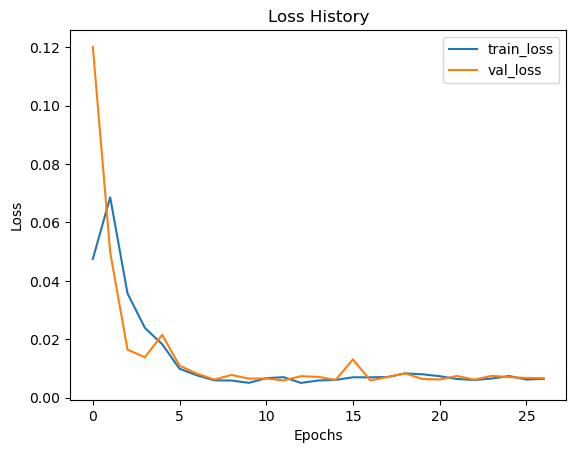

In [43]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

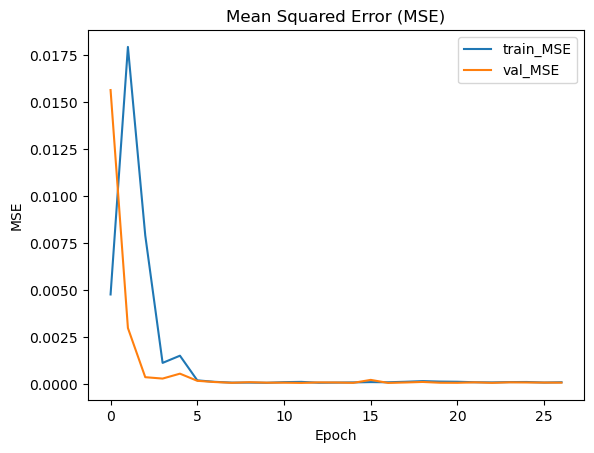

In [44]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

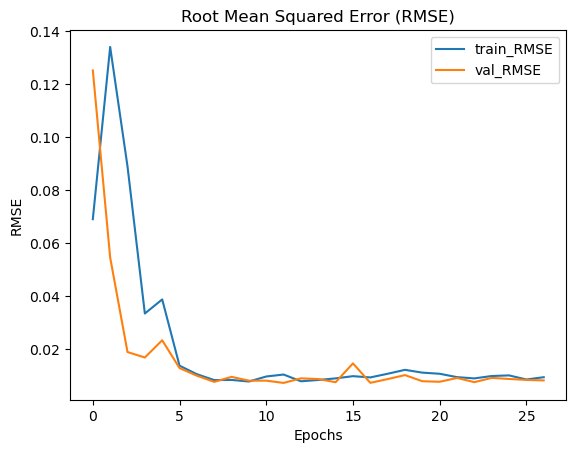

In [45]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

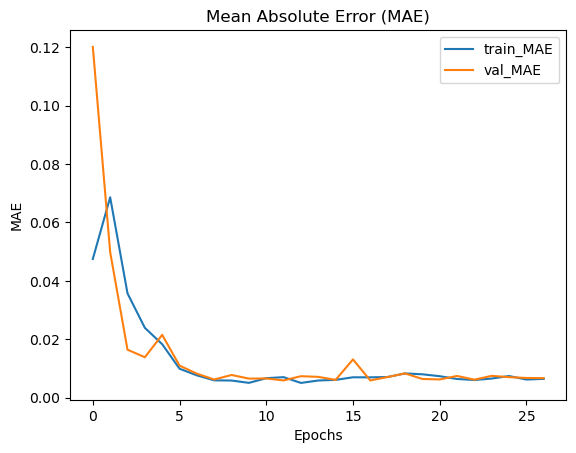

In [46]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

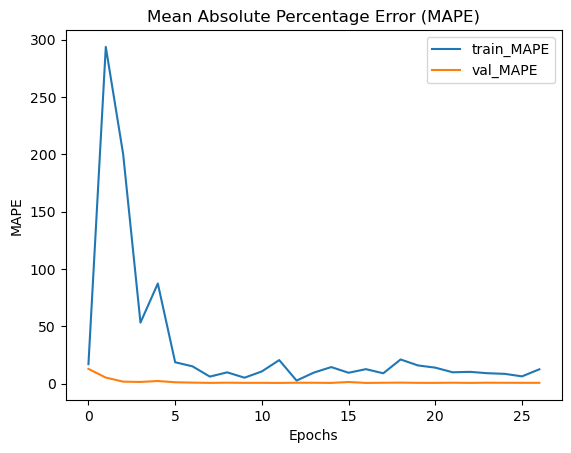

In [47]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 19:29:49.414209: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7599, 4, 1)
Labels Shape: (7599, 1, 1)
Prediction Shape: (7599, 1, 10)


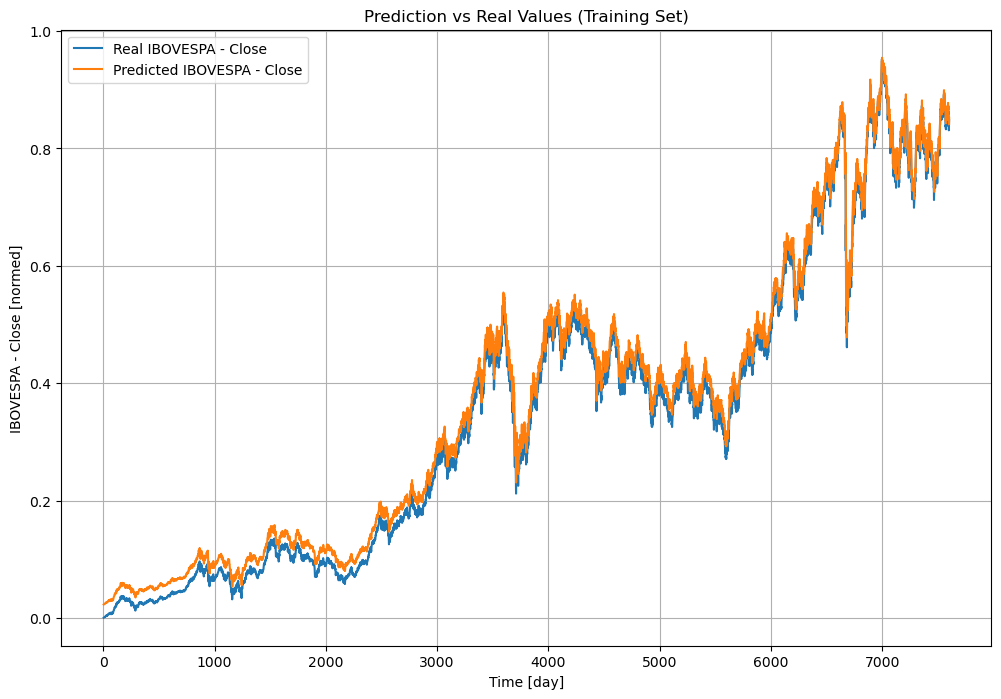

In [48]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 1)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


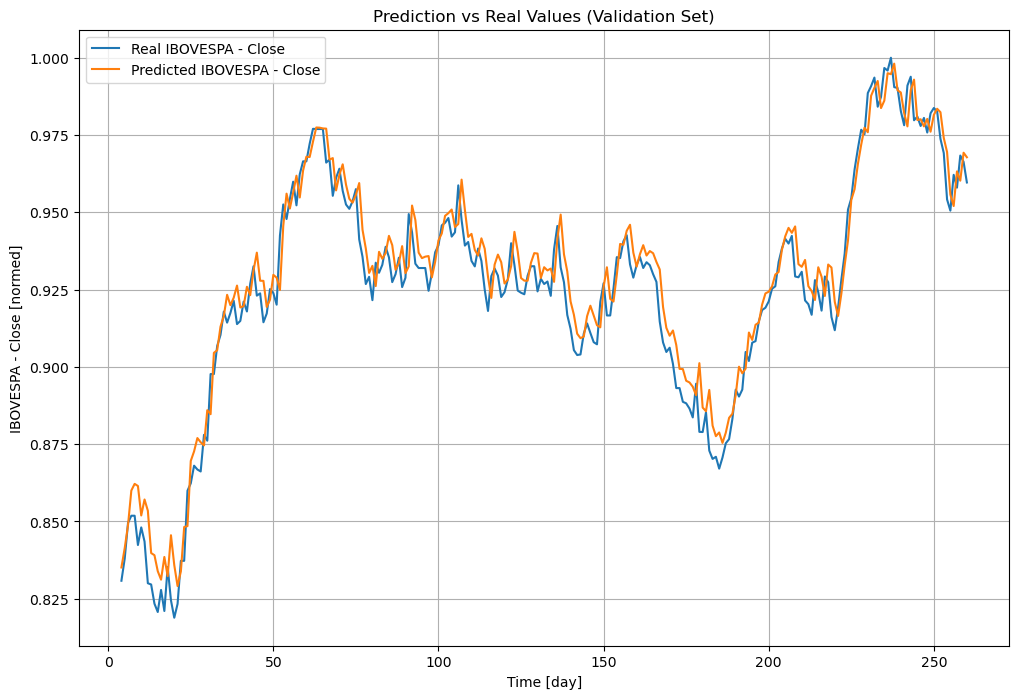

In [49]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 1)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


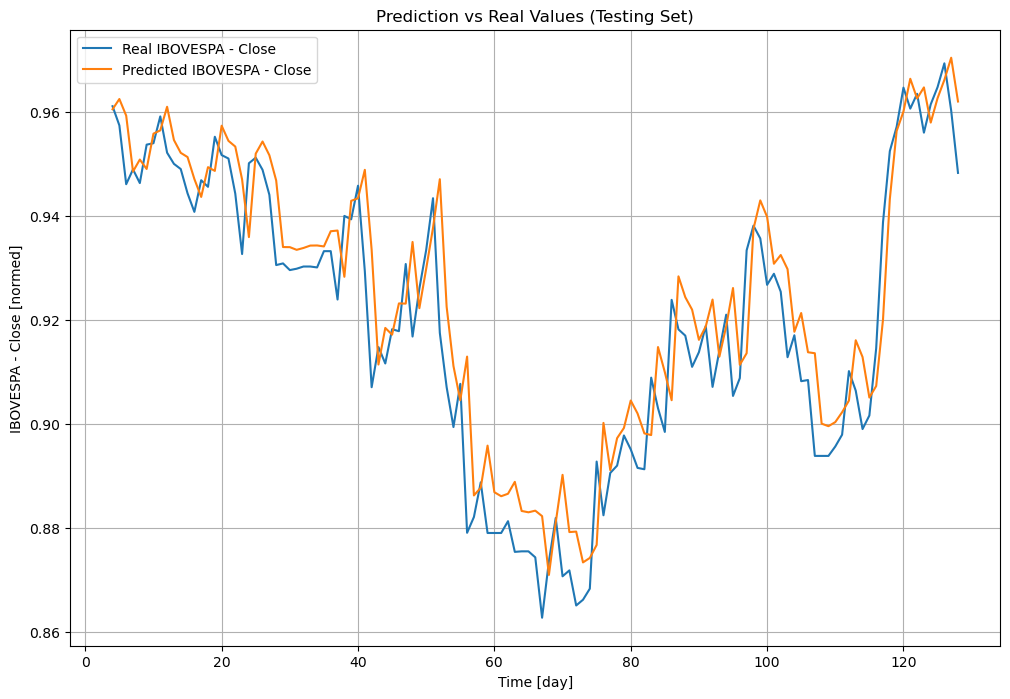

In [50]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

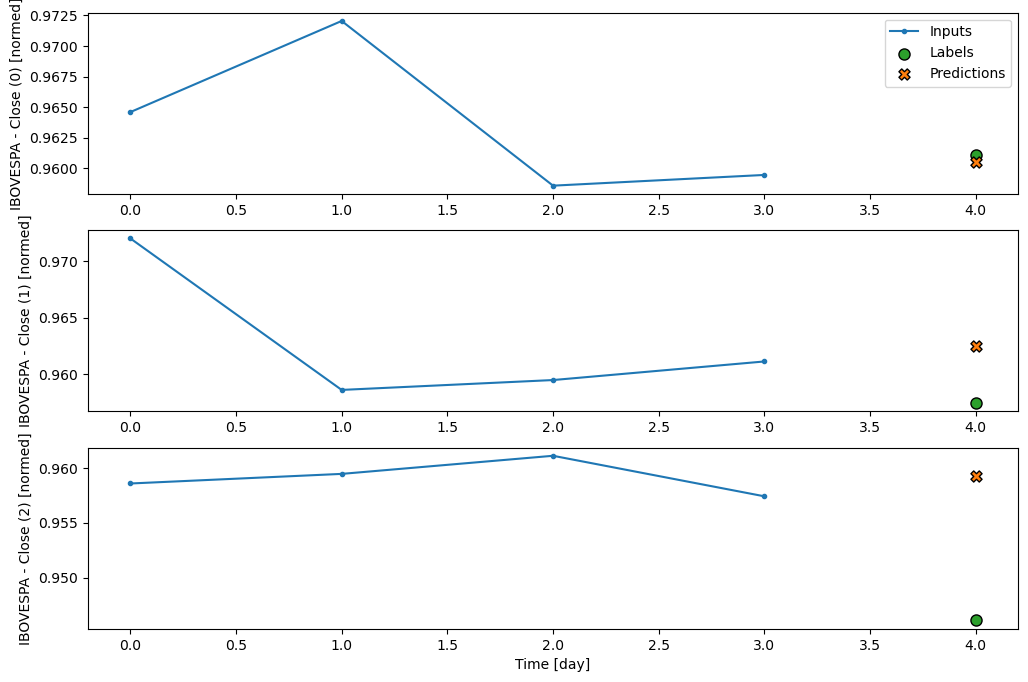

In [51]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [52]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:14s:602ms


In [53]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[[0.96052694, 0.96052694, 0.96052694, ..., 0.96052694,
         0.96052694, 0.96052694]],

       [[0.96250117, 0.96250117, 0.96250117, ..., 0.96250117,
         0.96250117, 0.96250117]],

       [[0.95930135, 0.95930135, 0.95930135, ..., 0.95930135,
         0.95930135, 0.95930135]],

       ...,

       [[0.9661796 , 0.9661796 , 0.9661796 , ..., 0.9661796 ,
         0.9661796 , 0.9661796 ]],

       [[0.97044957, 0.97044957, 0.97044957, ..., 0.97044957,
         0.97044957, 0.97044957]],

       [[0.9620197 , 0.9620197 , 0.9620197 , ..., 0.9620197 ,
         0.9620197 , 0.9620197 ]]], shape=(125, 1, 10), dtype=float32)

In [54]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [55]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')